# F1 DataBricks Project

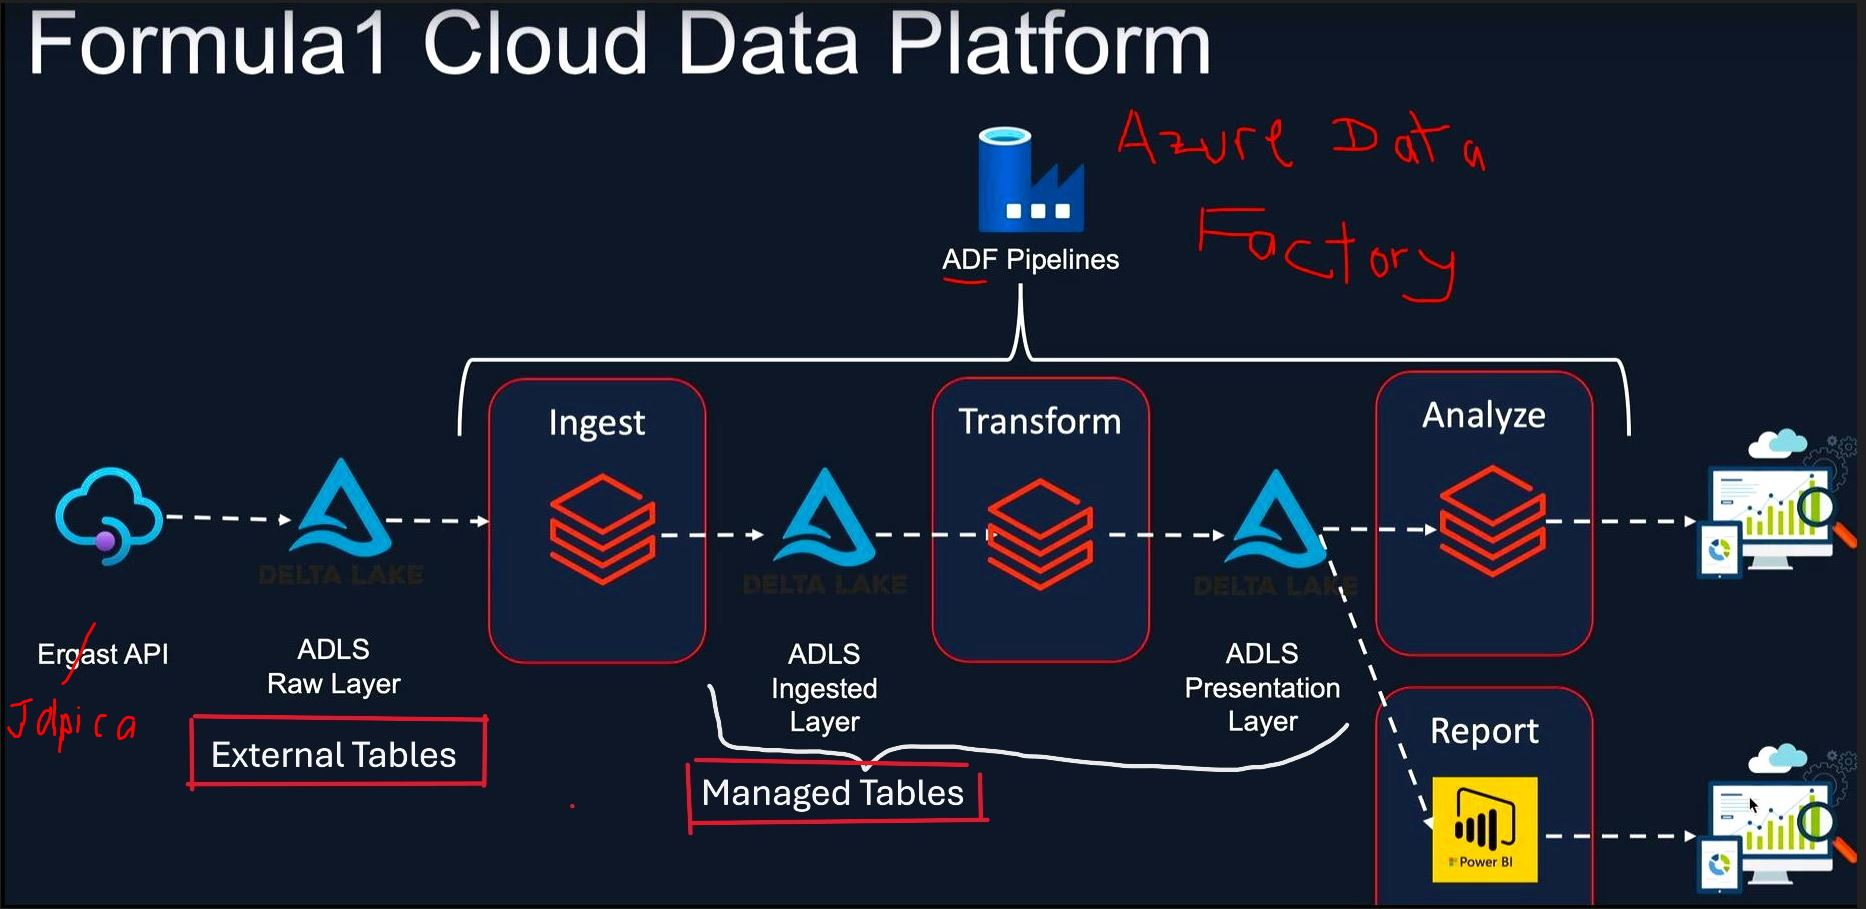

In this project I will:

- obtain data from the Jolpica F1 API
- store the data in Azure Data Lake Storage in Delta format
- follow the medallion architecture, i.e. create three separate layers ***raw***, ***processed***, and ***presentation***
- clean and transform the data using ***Spark*** and ***SQL*** within DataBricks Notebooks
- orchestrate a fully automated end-to-end pipeline with a trigger and scheduling of Notebook runs, using Azure Data Factory
- visualise the data using the inbuilt Databricks visualization tool

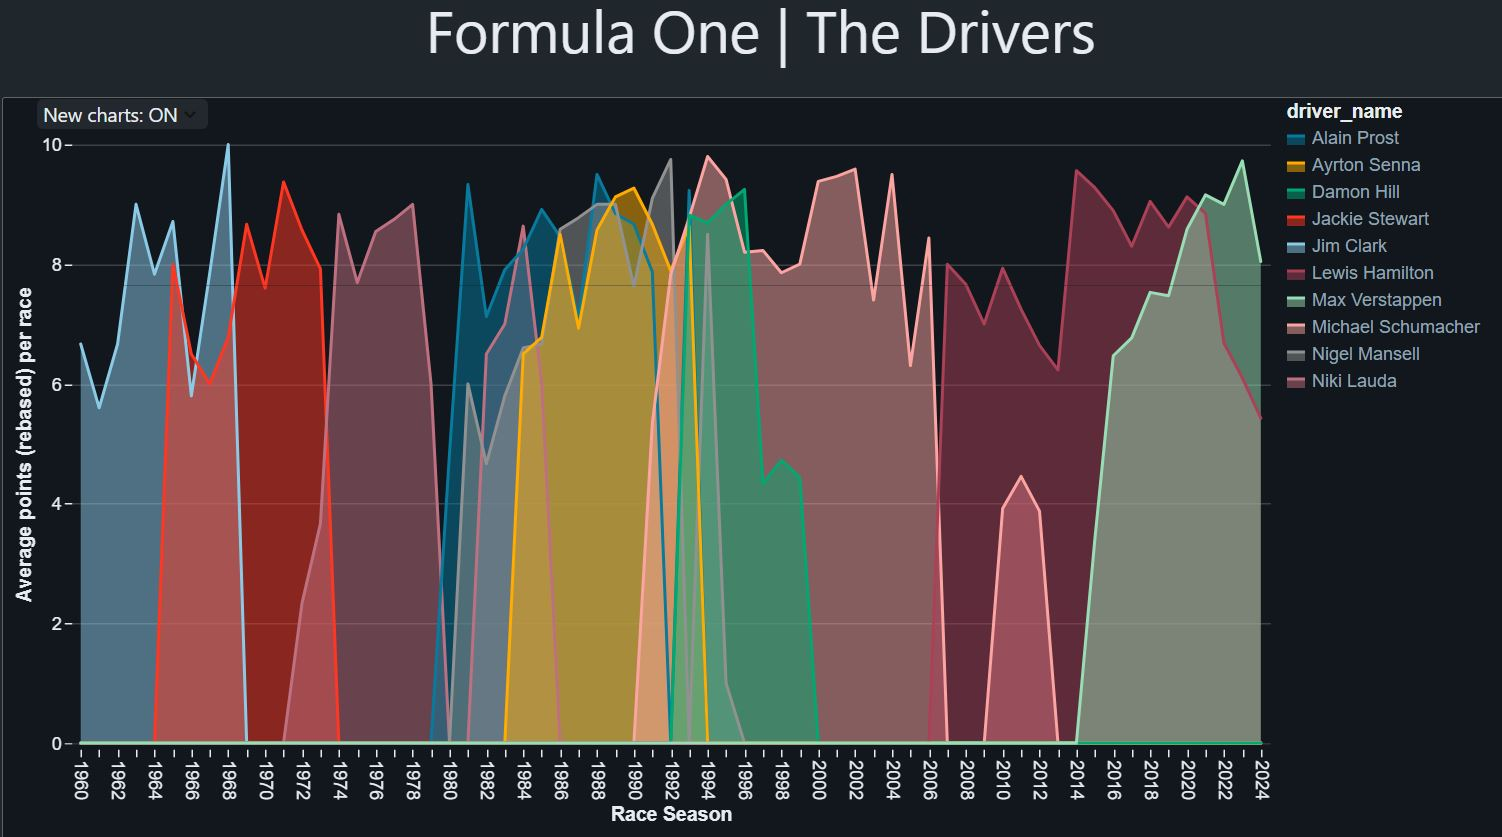

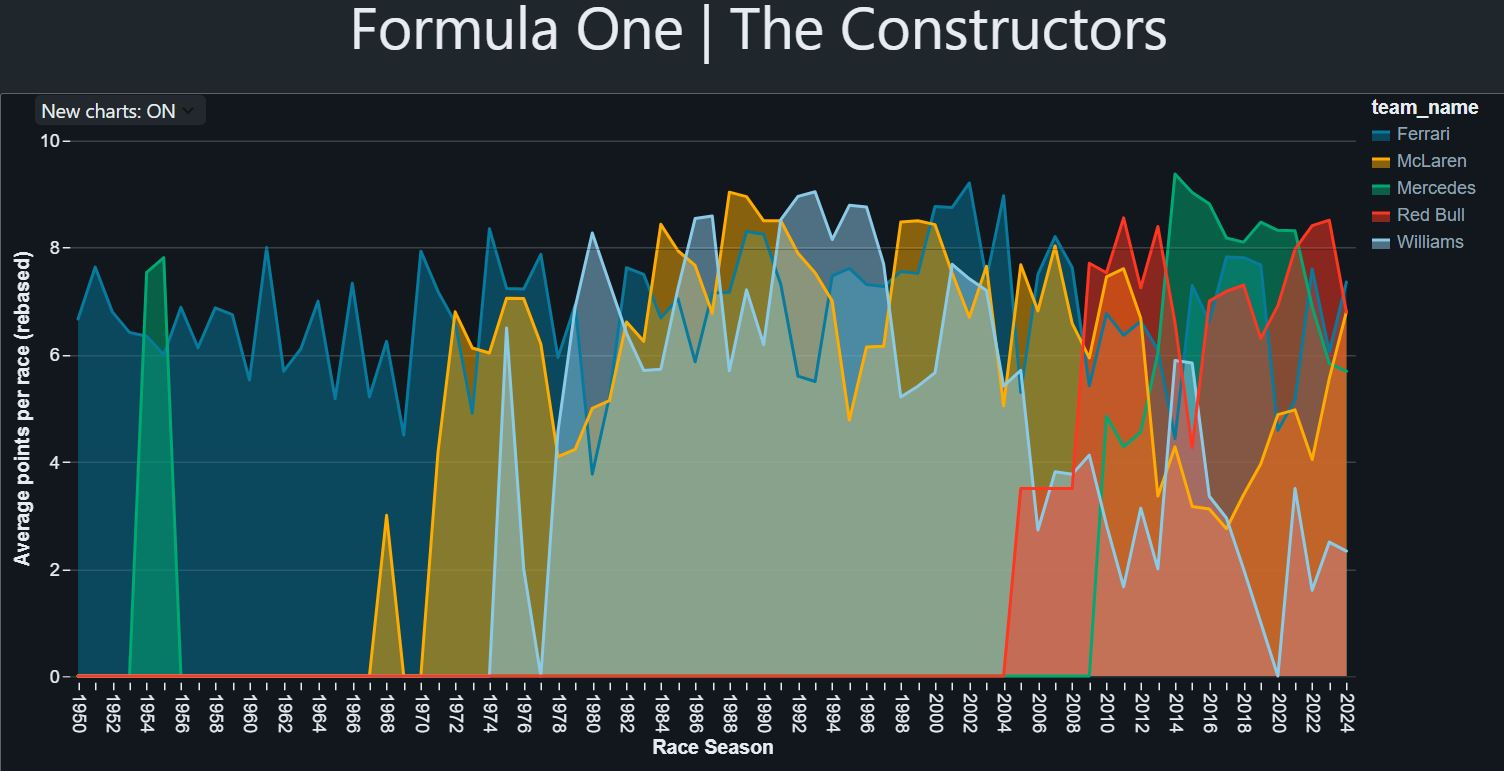


## Jolpica API

https://github.com/jolpica/jolpica-f1/tree/main/docs

## Microsoft Azure 

Microsoft Azure, formerly known as Windows Azure, is Microsoft's public cloud computing platform. It provides a broad range of cloud services, including compute, analytics, storage and networking. Users can choose from these services to develop and scale new applications or run existing applications in the public cloud.

Microsoft charges for Azure on a pay-as-you-go (PAYG) basis, meaning subscribers receive a bill each month that only charges them for the specific resources and services they have used, howvever I took advantage of the [14 day free trial](https://azure.microsoft.com/en-gb/pricing/offers/ms-azr-0044p). which includes the equivalent of $200 credit.

### Configuration

As with all cloud platforms, there's a fair bit of setting up to do in terms of which resources you want to choose, access control via a Key Vault, verification procedures etc.

### Create a storage account

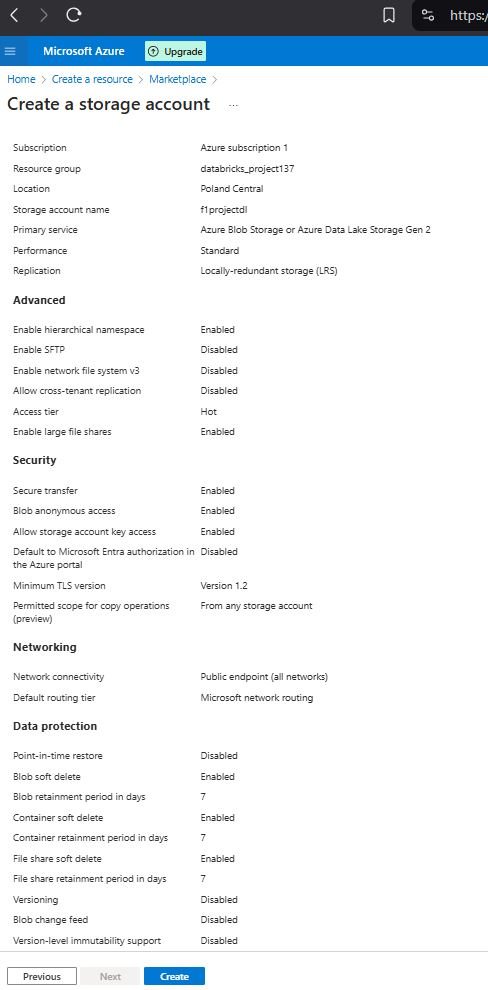

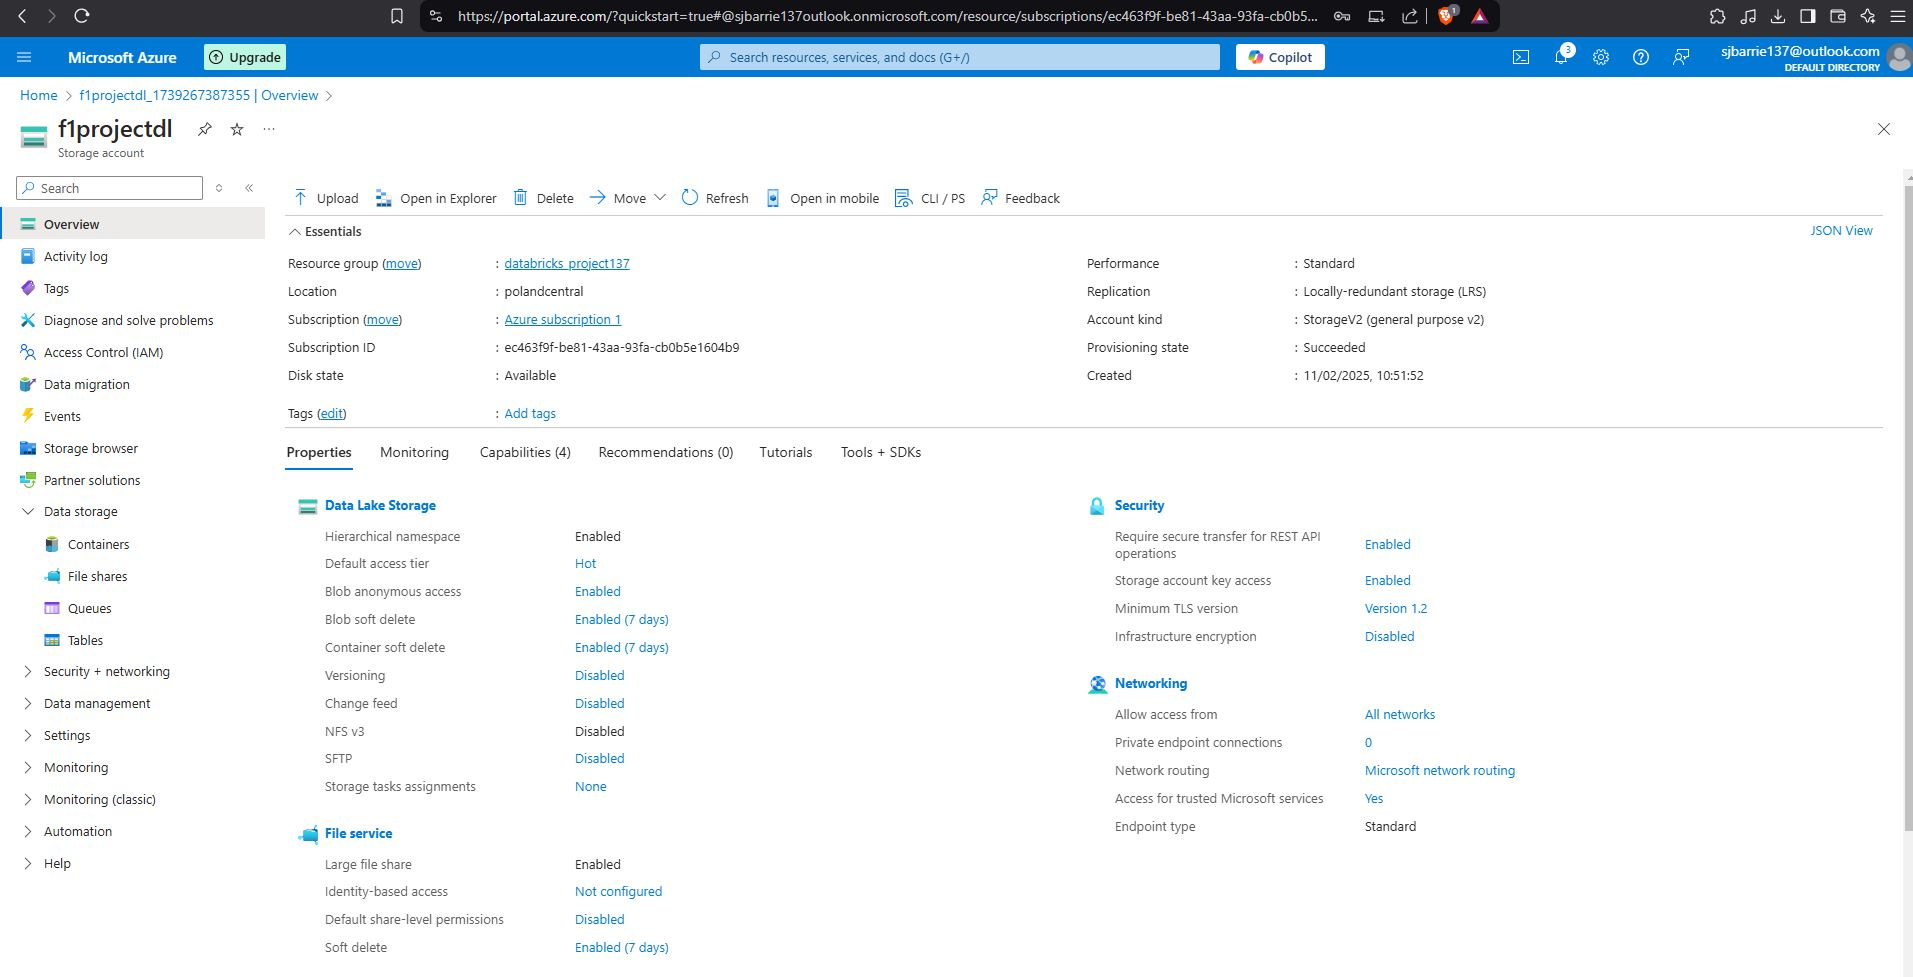

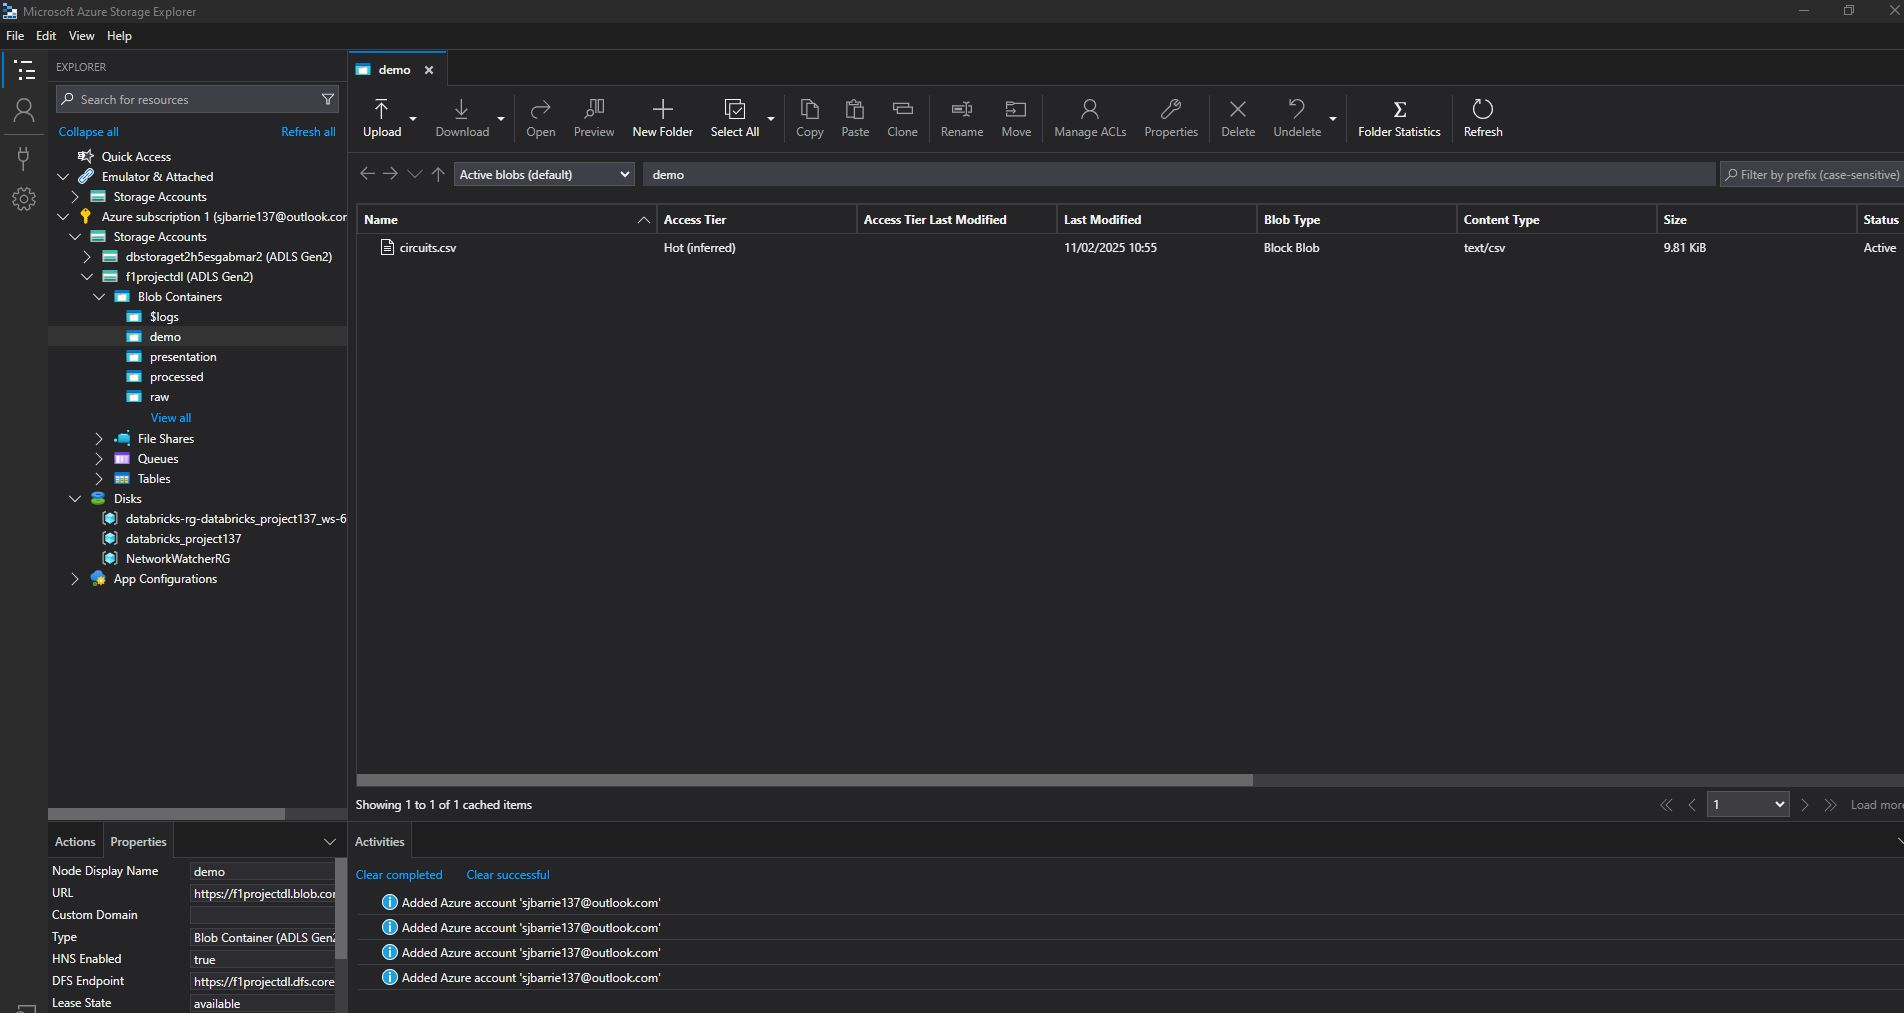

## Databricks

Databricks, Inc. is a global data, analytics, and artificial intelligence (AI) company, founded in 2013 by the original creators of Apache Spark.The company provides a cloud-based platform to help enterprises build, scale, and govern data and AI, including generative AI and other machine learning models.

Databricks pioneered the data lakehouse, a data and AI platform that combines the capabilities of a data warehouse with a data lake, allowing organizations to manage and use both structured and unstructured data for traditional business analytics and AI workloads. The company similarly develops Delta Lake, an open-source project to bring reliability to data lakes for machine learning and other data science use cases.

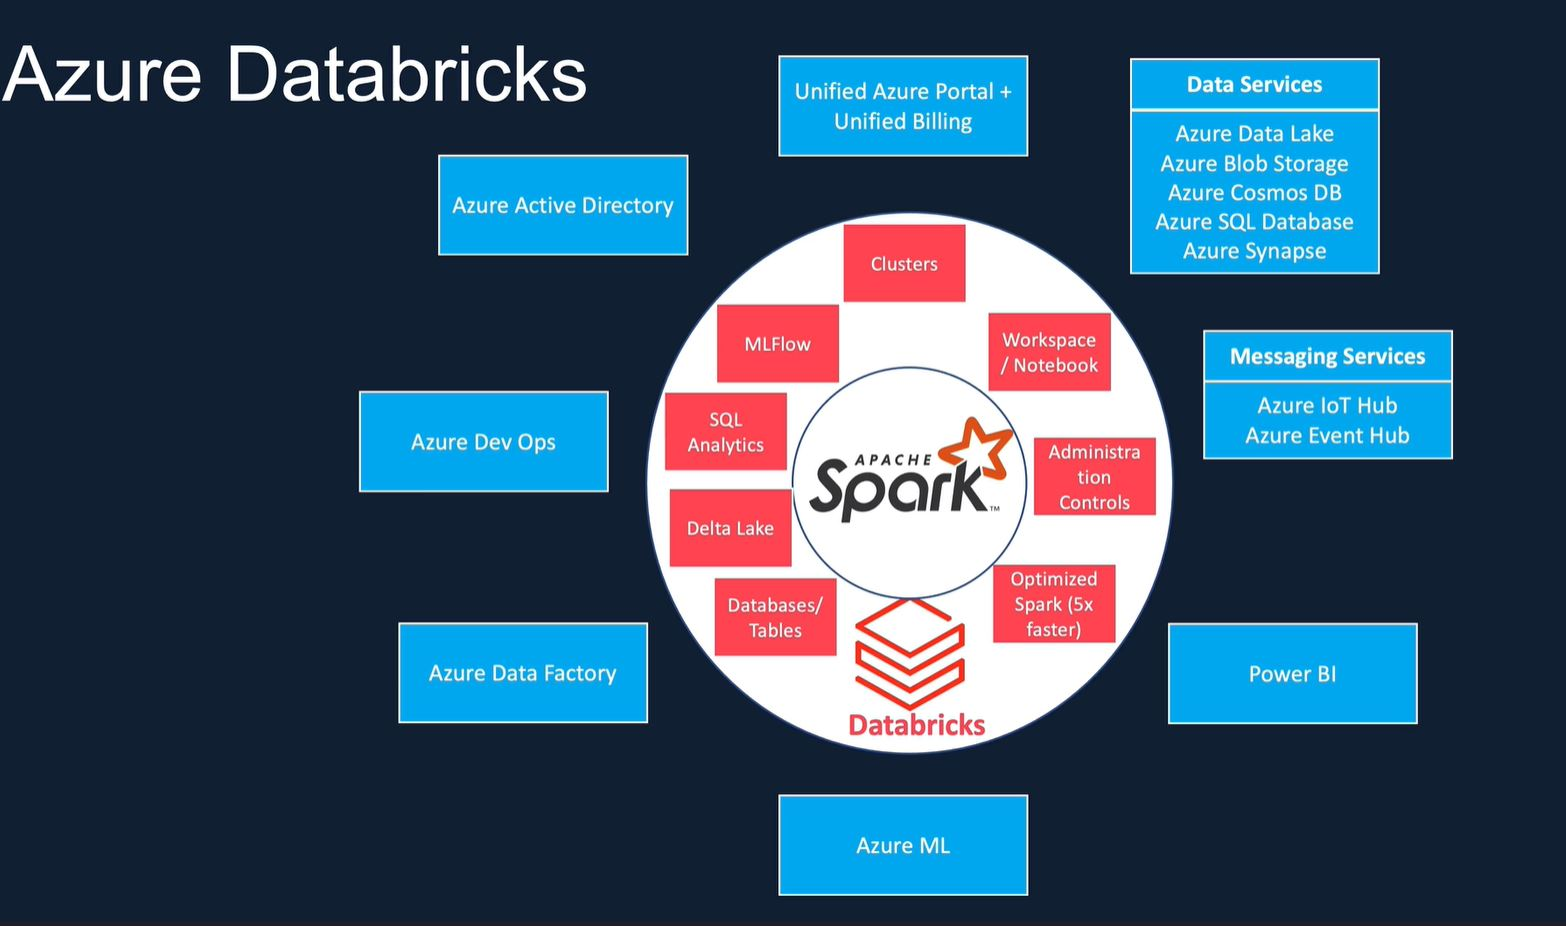

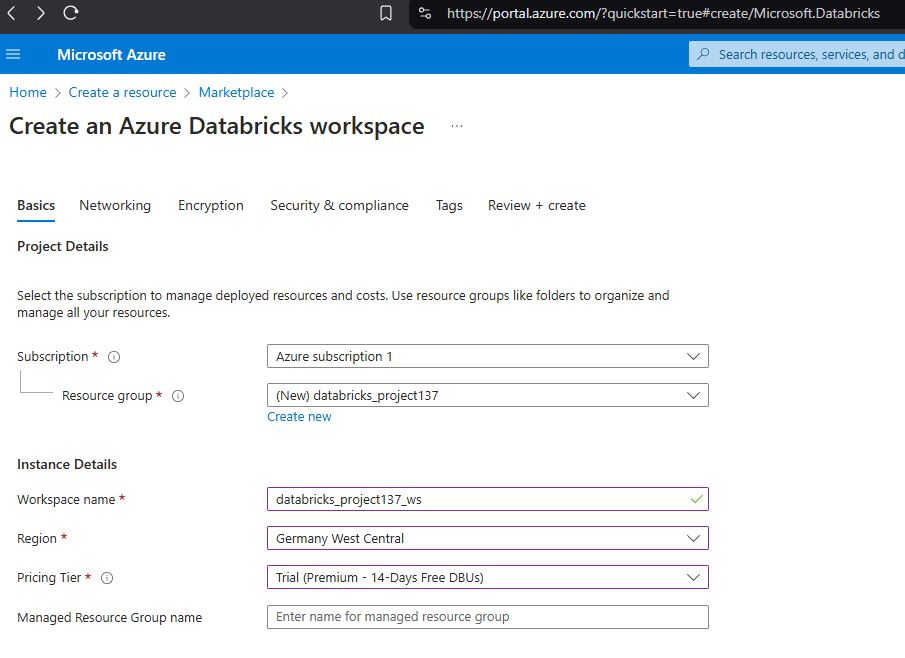

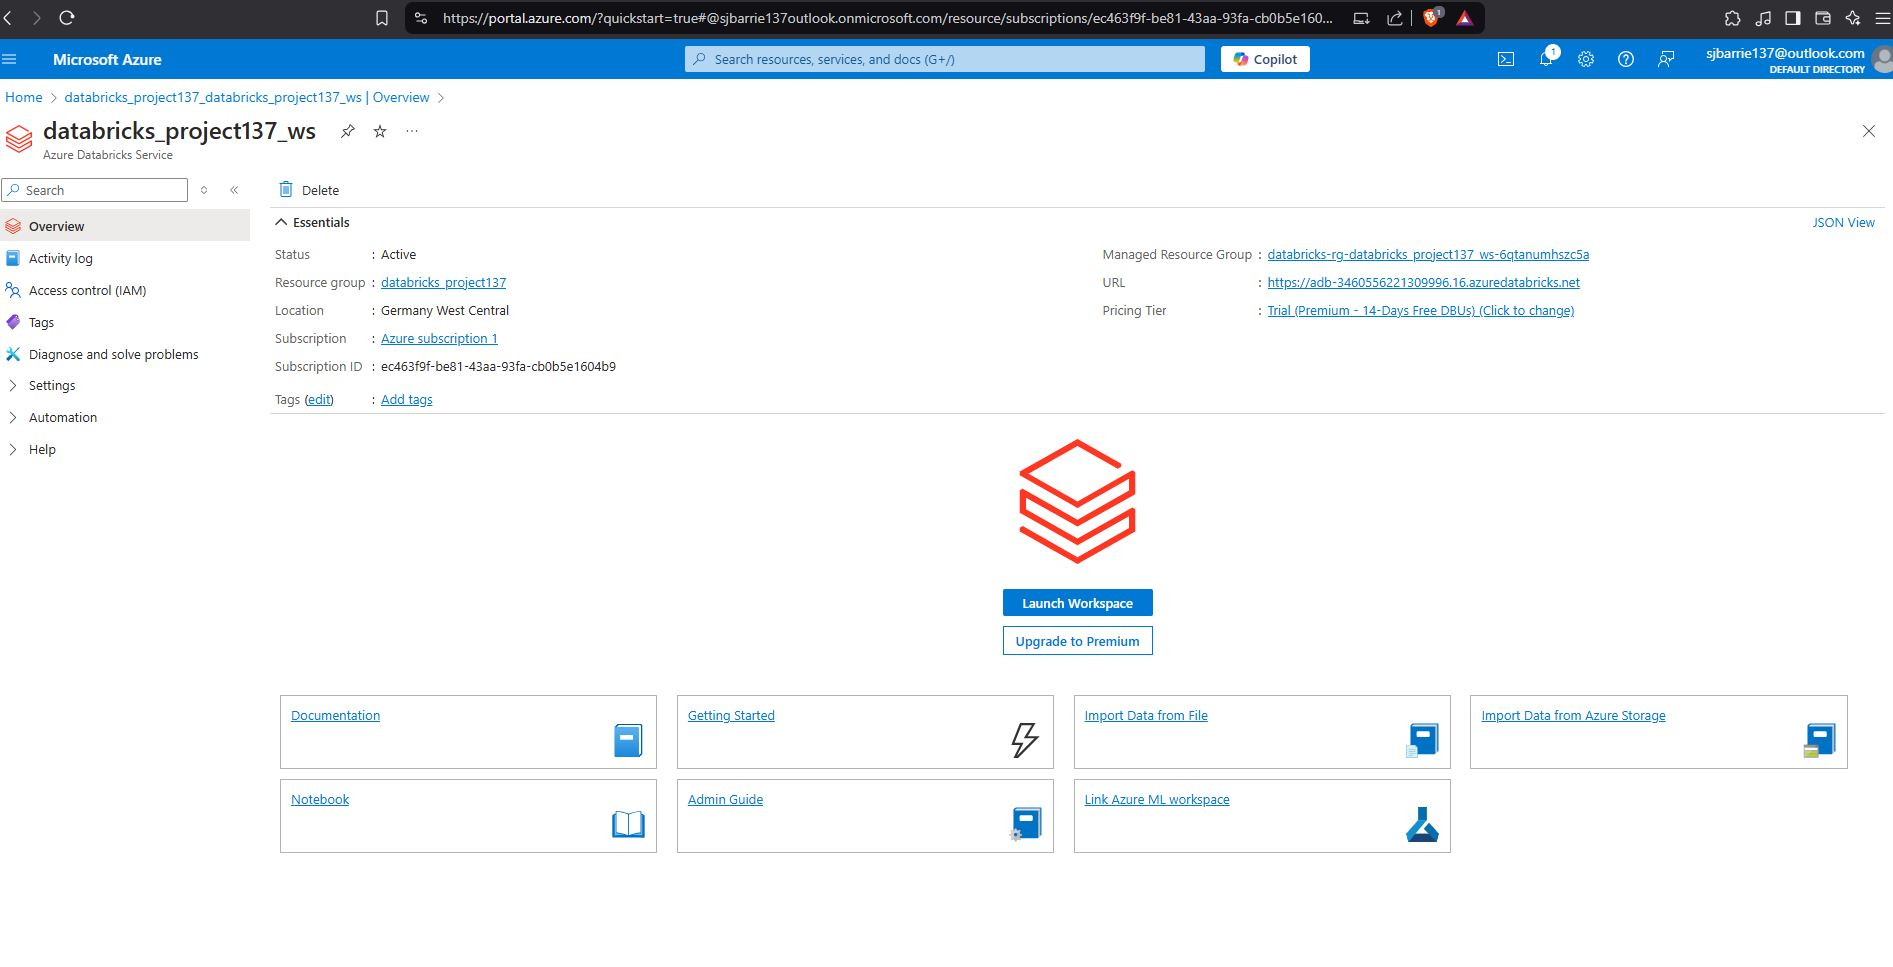

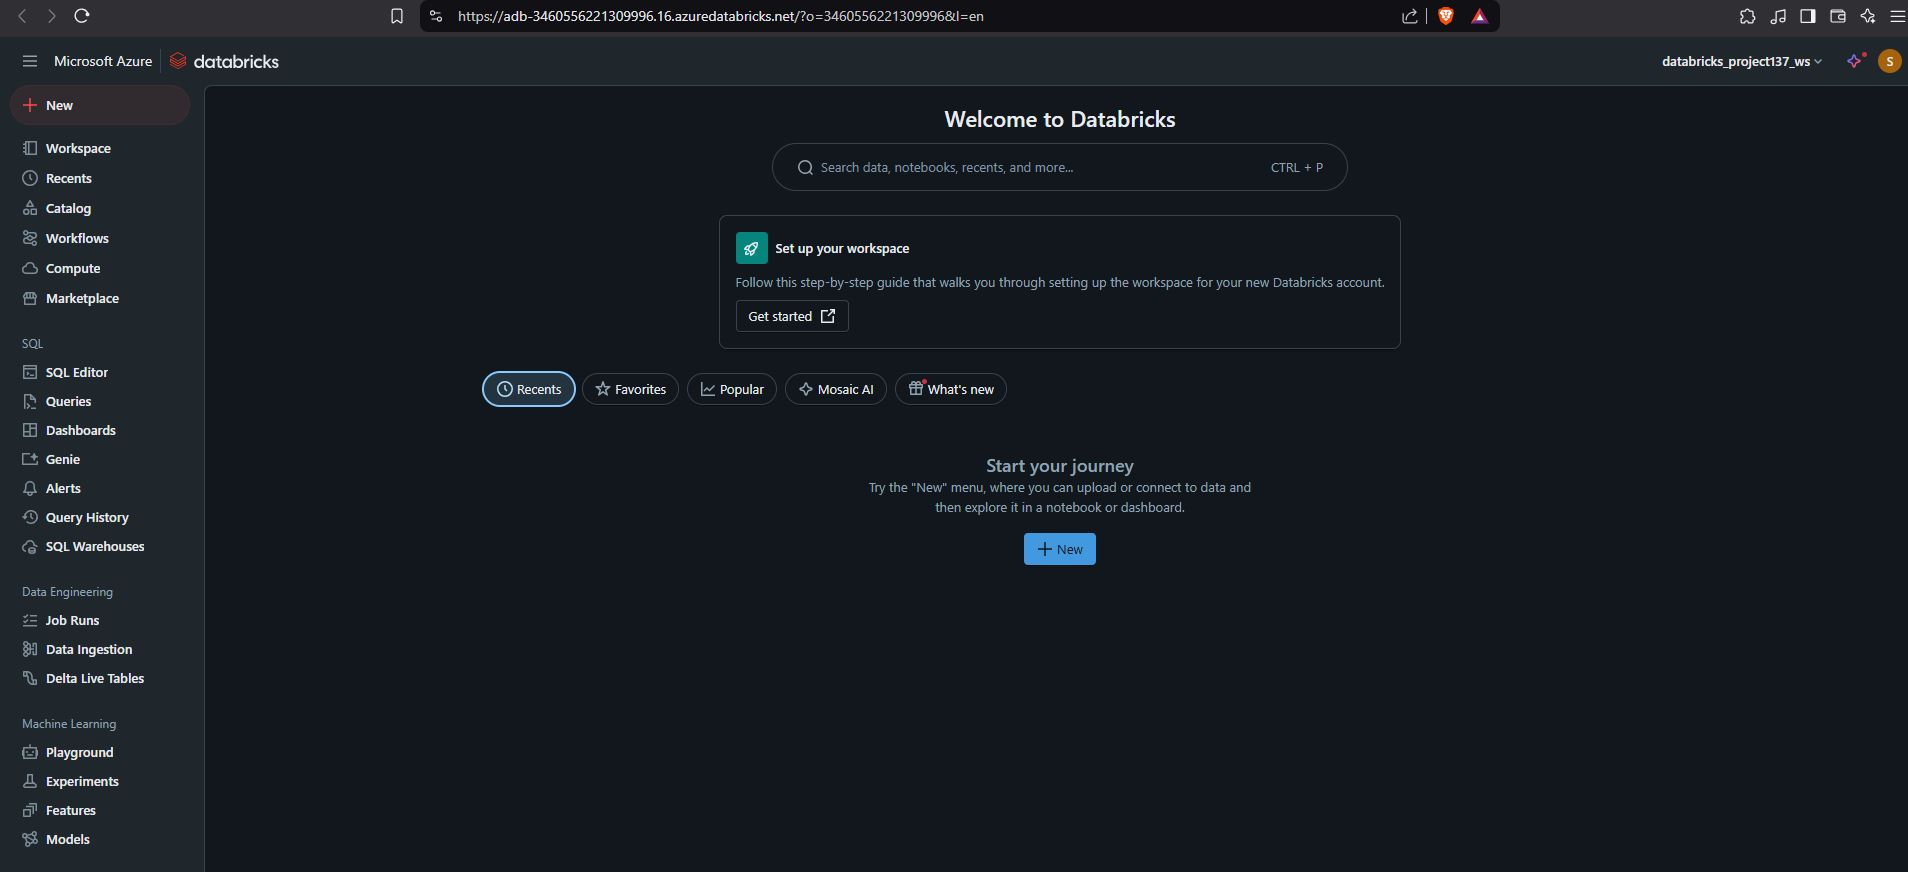

### Clusters

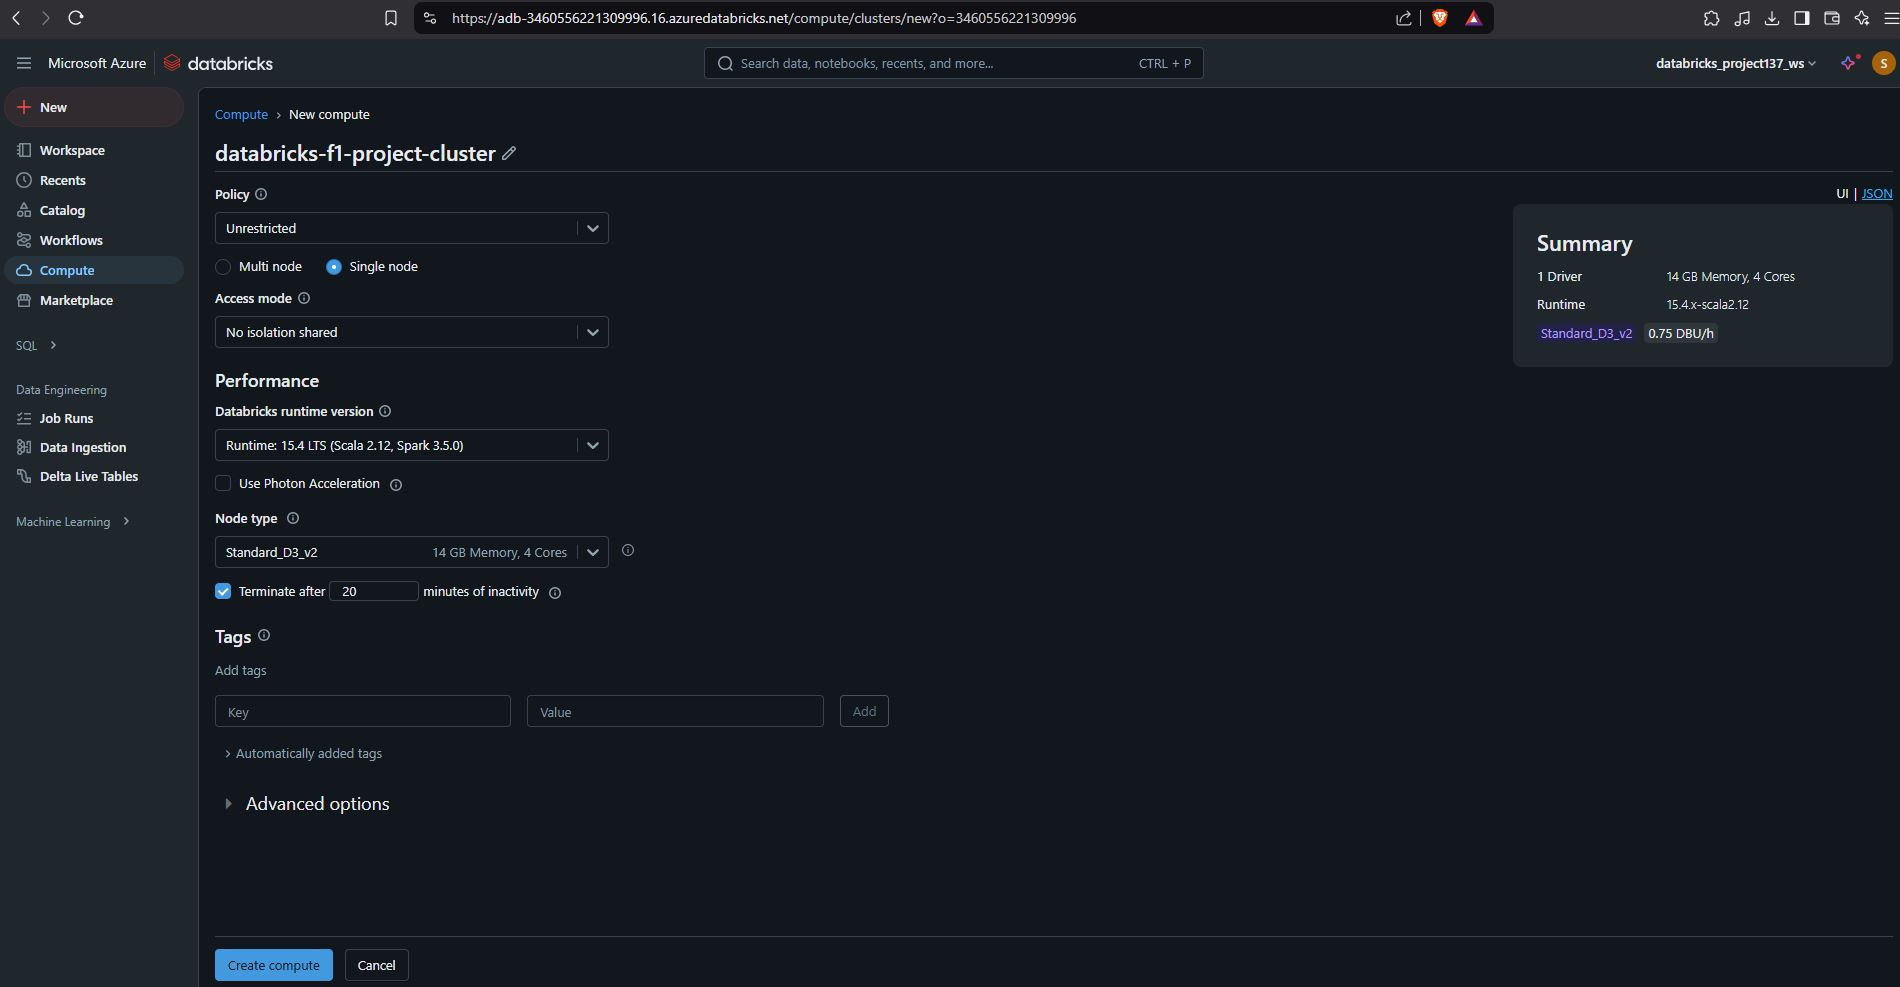

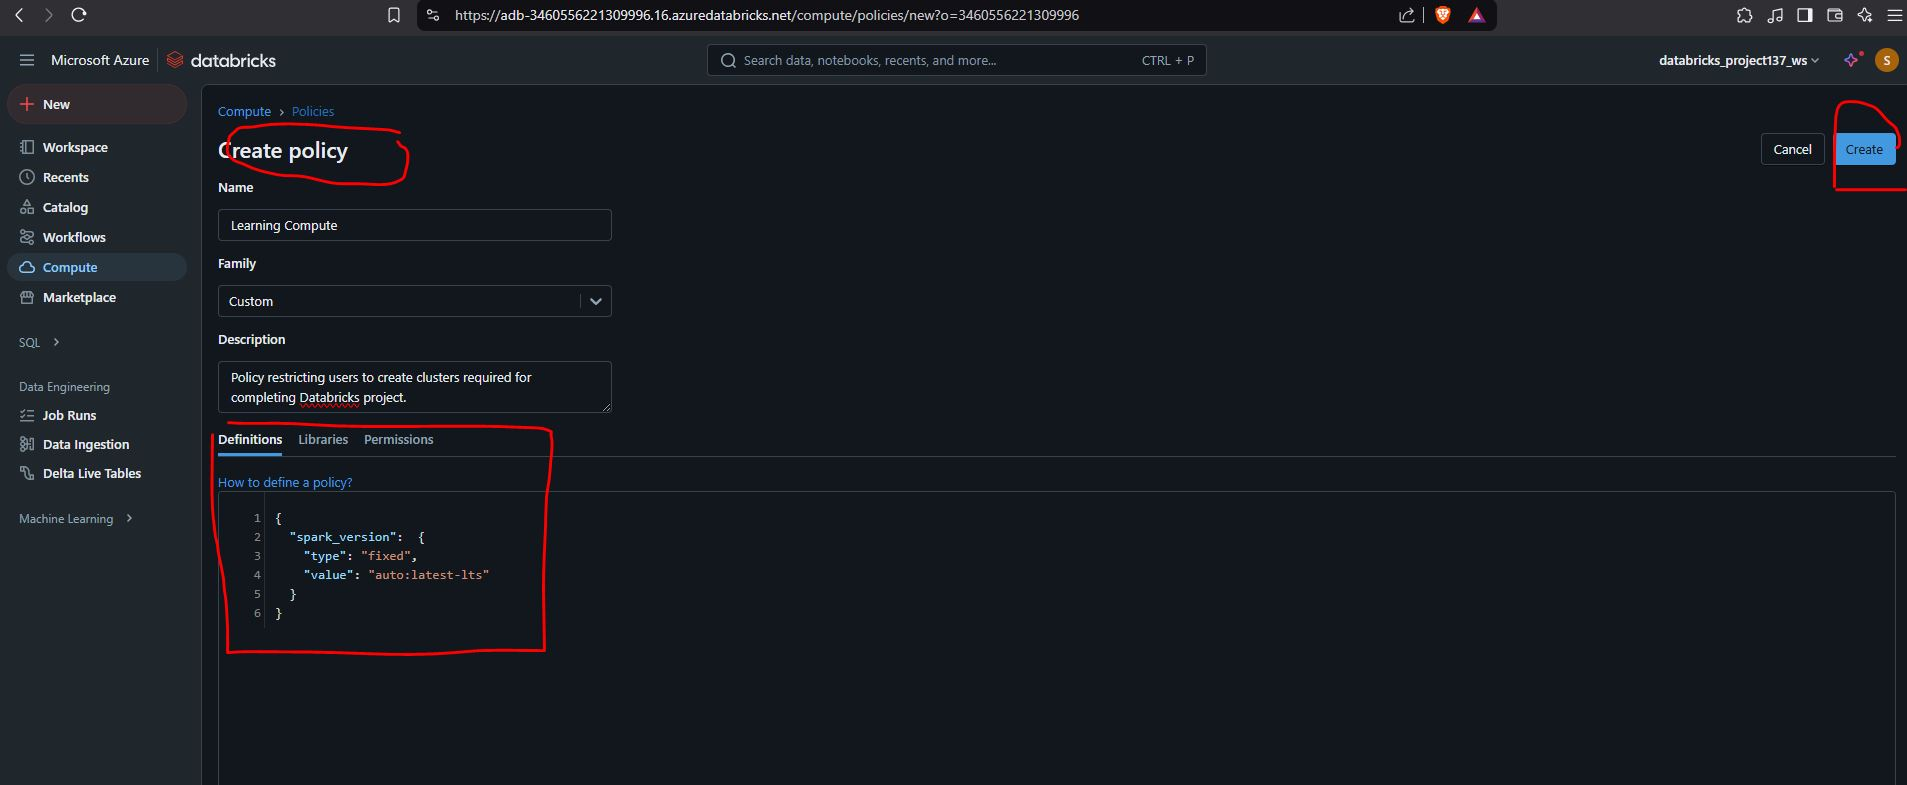

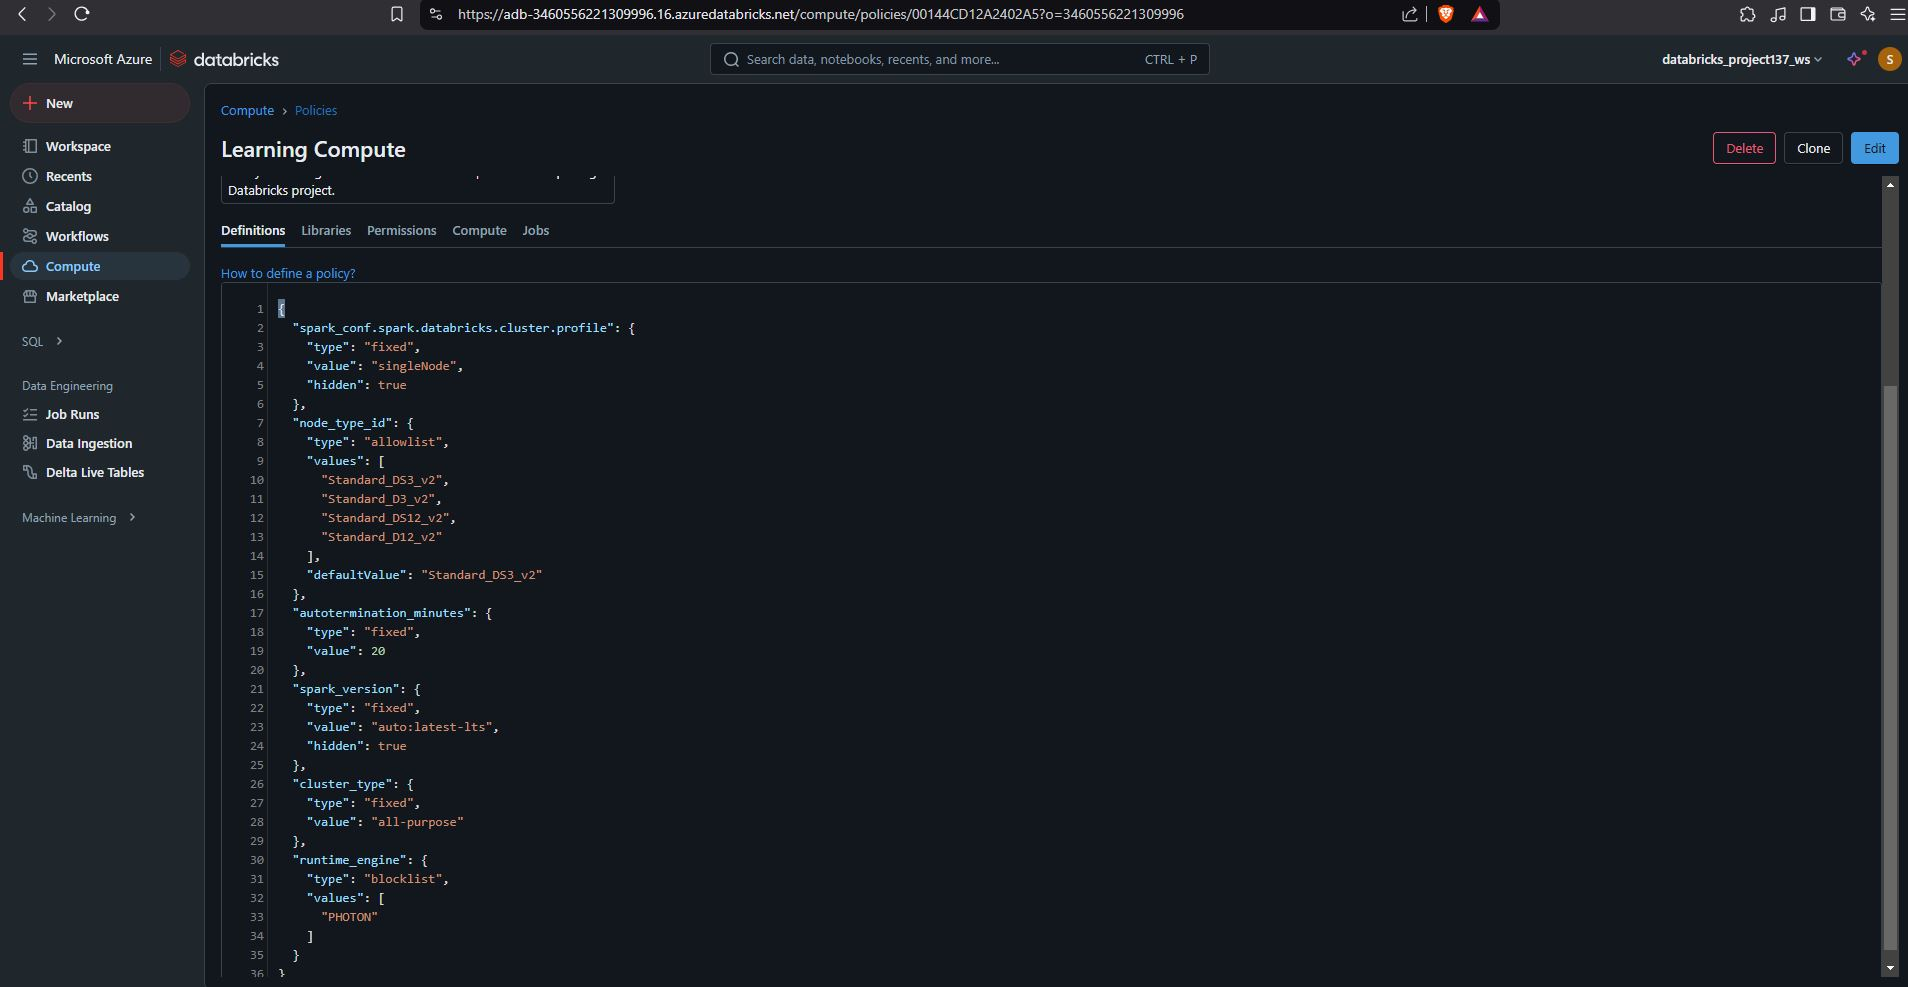

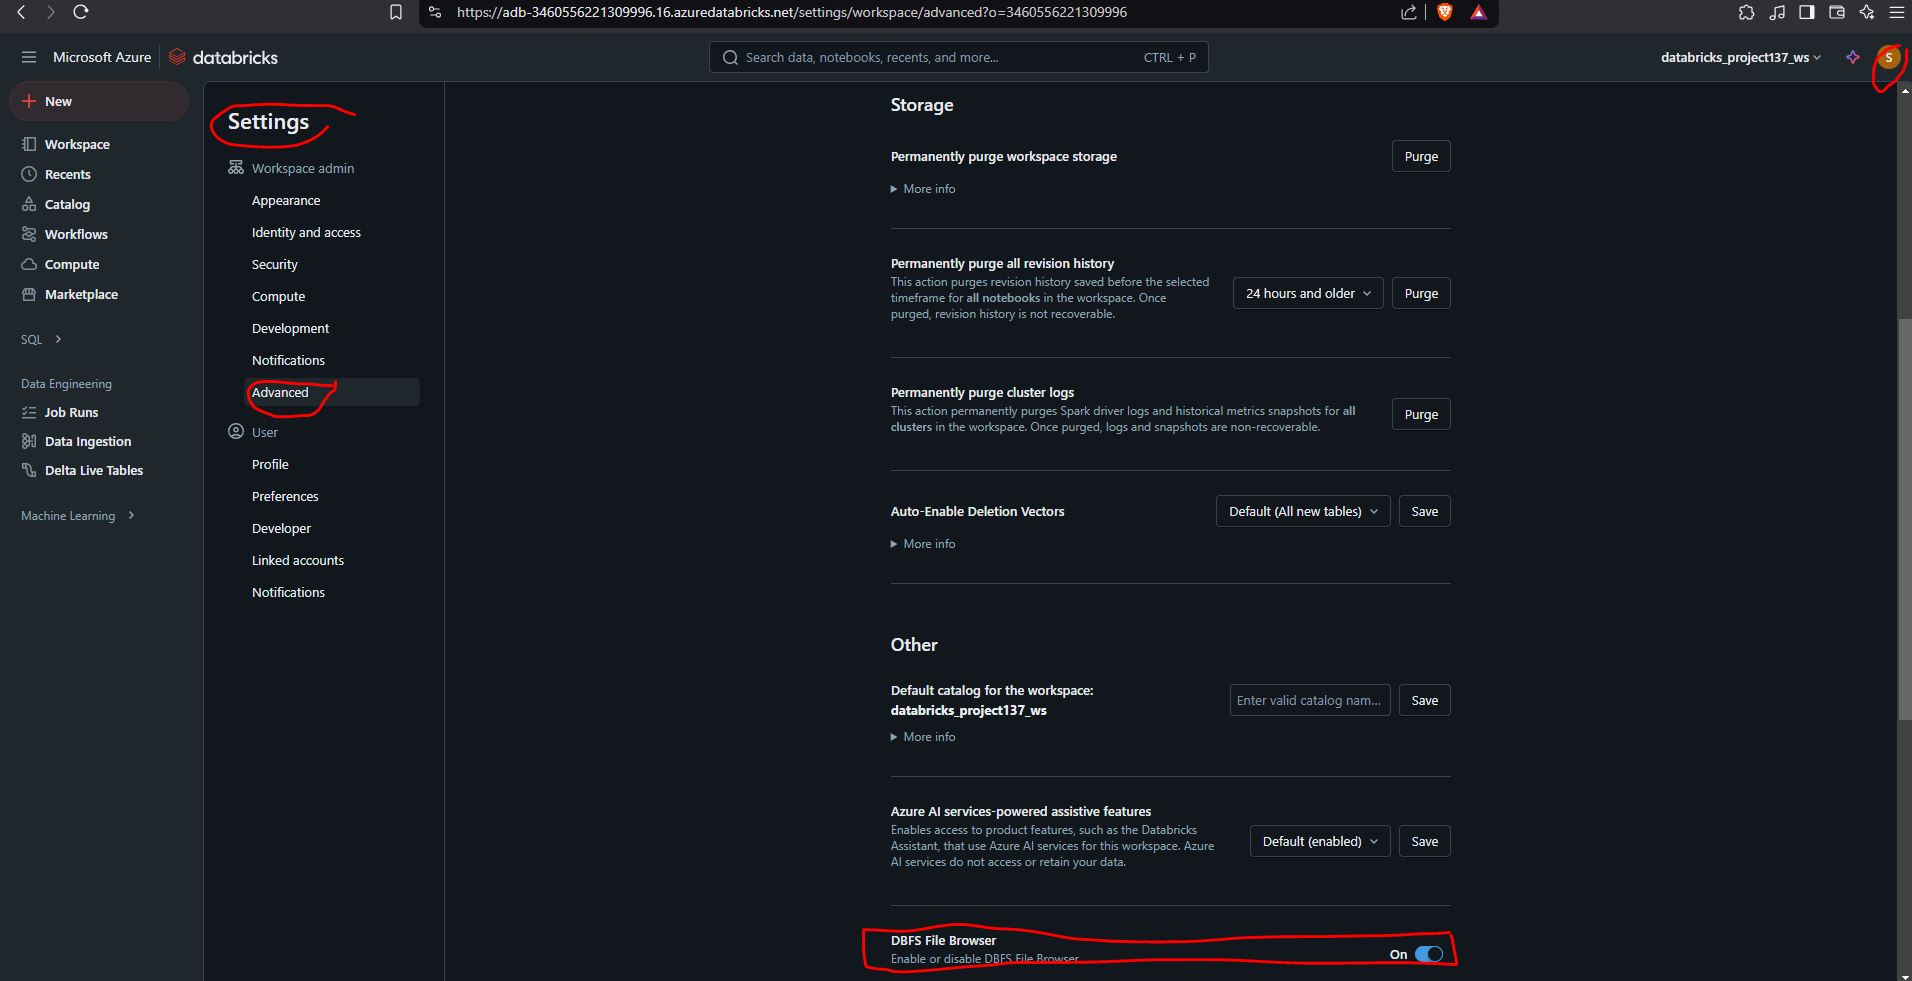

## Databricks NoteBooks

One of the fantastic features is the ability to switch languages within the Notebook.

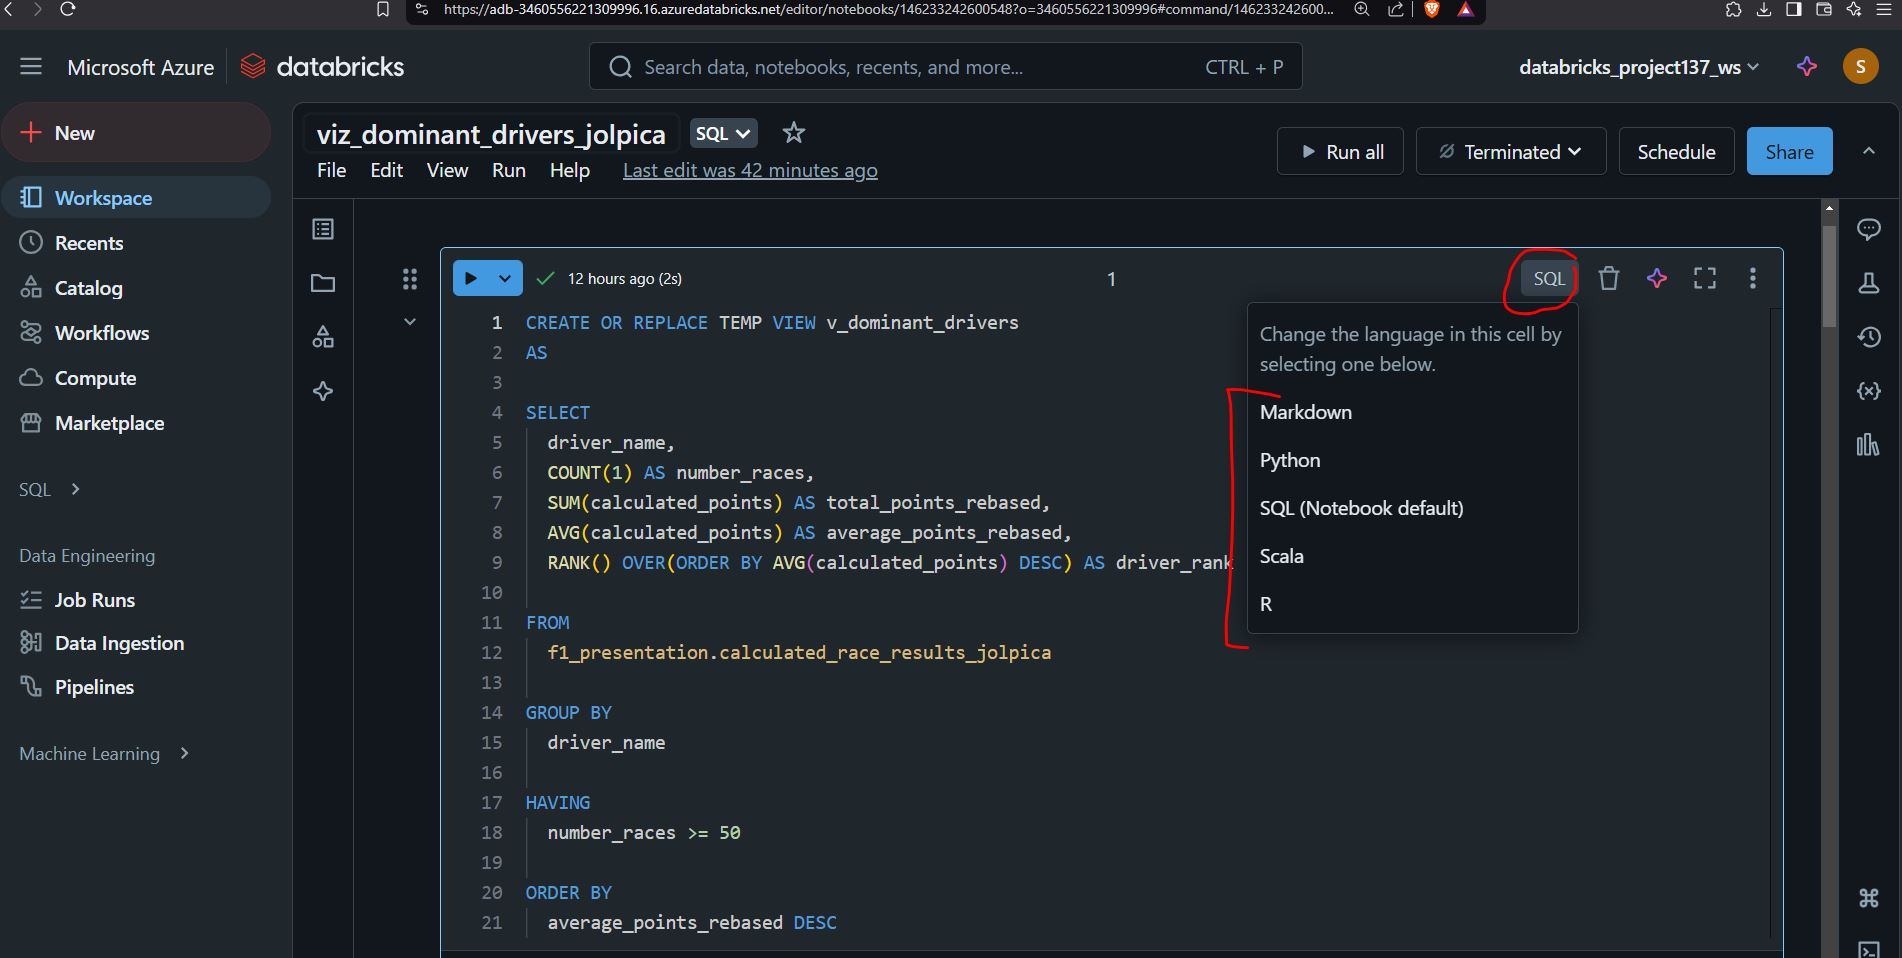

## Connect to Microsoft Azure Storage Containers

https://learn.microsoft.com/en-us/azure/databricks/connect/storage/azure-storage#--access-azure-data-lake-storage-gen2-or-blob-storage-using-oauth-20-with-an-azure-service-principal


In [ ]:
client_id = dbutils.secrets.get(scope="f1_project_scope",key="f1-app-client-id" )
tenant_id = dbutils.secrets.get(scope="f1_project_scope",key="f1-app-tenant-id" )
client_secret = dbutils.secrets.get(scope="f1_project_scope",key="f1-app-client-secret")

spark.conf.set("fs.azure.account.auth.type.f1projectdl.dfs.core.windows.net", "OAuth")
spark.conf.set("fs.azure.account.oauth.provider.type.f1projectdl.dfs.core.windows.net", "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider")

spark.conf.set("fs.azure.account.oauth2.client.id.f1projectdl.dfs.core.windows.net", client_id)
spark.conf.set("fs.azure.account.oauth2.client.secret.f1projectdl.dfs.core.windows.net", client_secret)
spark.conf.set("fs.azure.account.oauth2.client.endpoint.f1projectdl.dfs.core.windows.net", f"https://login.microsoftonline.com/{tenant_id}/oauth2/token")

display(dbutils.fs.ls("abfss://demo@f1projectdl.dfs.core.windows.net"))

display(spark.read.csv("abfss://demo@f1projectdl.dfs.core.windows.net/circuits.csv"))

### Mount Storage Containers and assign paths to variables

https://learn.microsoft.com/en-us/azure/databricks/dbfs/mounts

In [ ]:
def mount_adls(storage_account_name, container_name):
    client_id = dbutils.secrets.get(scope="f1_project_scope",key="f1-app-client-id" )
    tenant_id = dbutils.secrets.get(scope="f1_project_scope",key="f1-app-tenant-id" )
    client_secret = dbutils.secrets.get(scope="f1_project_scope",key="f1-app-client-secret")

    configs = {"fs.azure.account.auth.type": "OAuth",
          "fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
          "fs.azure.account.oauth2.client.id": client_id,
          "fs.azure.account.oauth2.client.secret": client_secret,
          "fs.azure.account.oauth2.client.endpoint": f"https://login.microsoftonline.com/{tenant_id}/oauth2/token"}
    
    # Unmount the mount point if it already exists
    if any(mount.mountPoint == f"/mnt/{storage_account_name}/{container_name}" for mount in dbutils.fs.mounts()):
        dbutils.fs.unmount(f"/mnt/{storage_account_name}/{container_name}")

    # Mount the storage account container
    dbutils.fs.mount(
        source = f"abfss://{container_name}@{storage_account_name}.dfs.core.windows.net/",
        mount_point = f"/mnt/{storage_account_name}/{container_name}", # good practice to reference storage account/container
        extra_configs = configs)
    
    display(dbutils.fs.mounts())

## Apache Spark

https://spark.apache.org/docs/3.5.4/api/python/reference/pyspark.sql/index.html

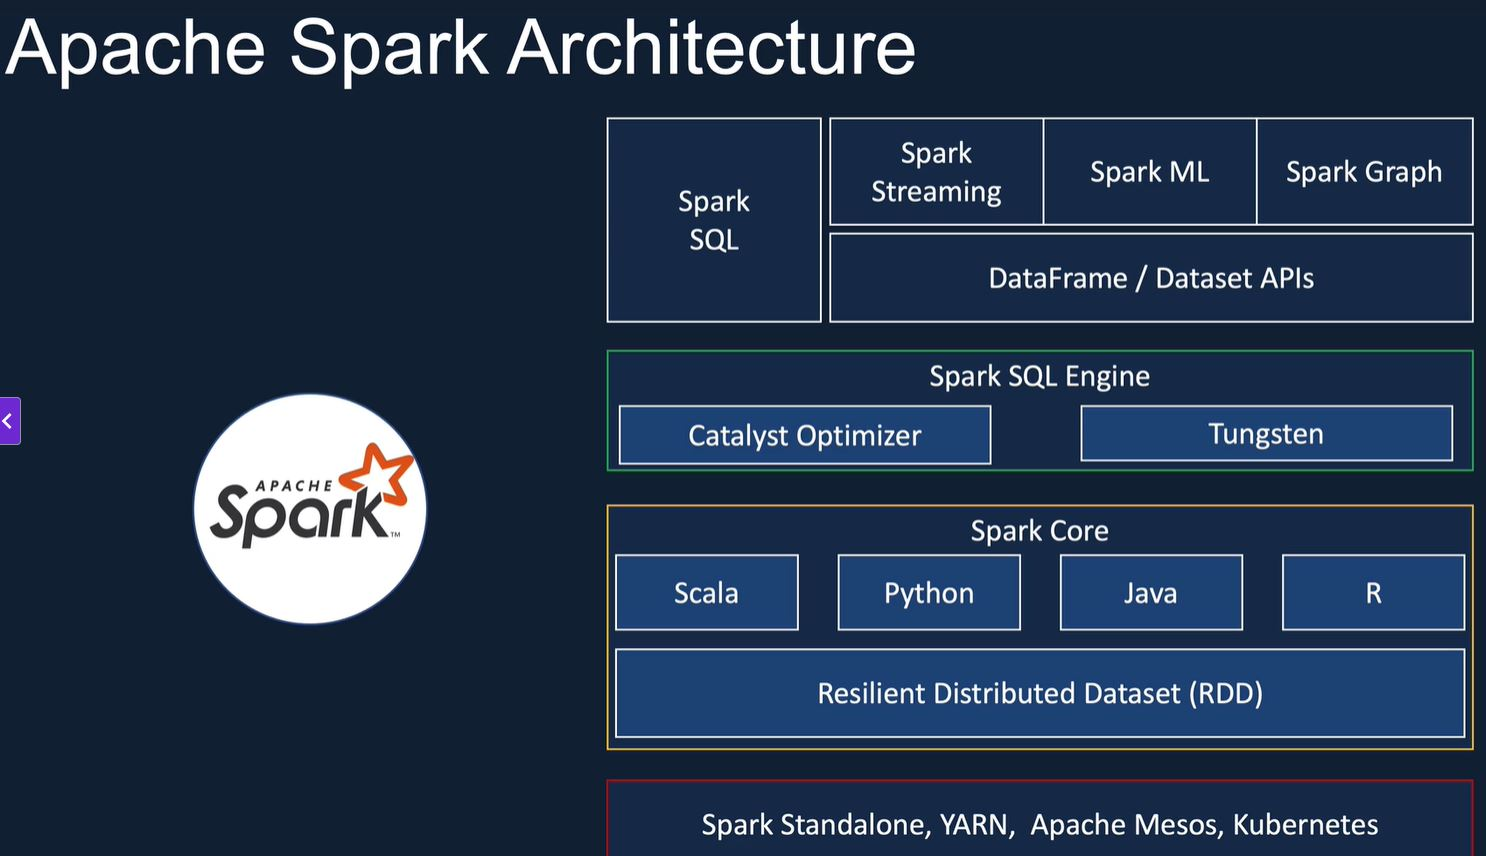

## Azure Data Factory

[Azure Data Factory (ADF)](https://azure.microsoft.com/en-us/products/data-factory) is a fully managed, serverless data integration solution. I leveraged ADF to create a scalable pipeline to incrementally ingest, transform and present the data that I obtained from the Jolpica API.

This was fully automated making use of the trigger feature and took just two and a half minutes to complete.

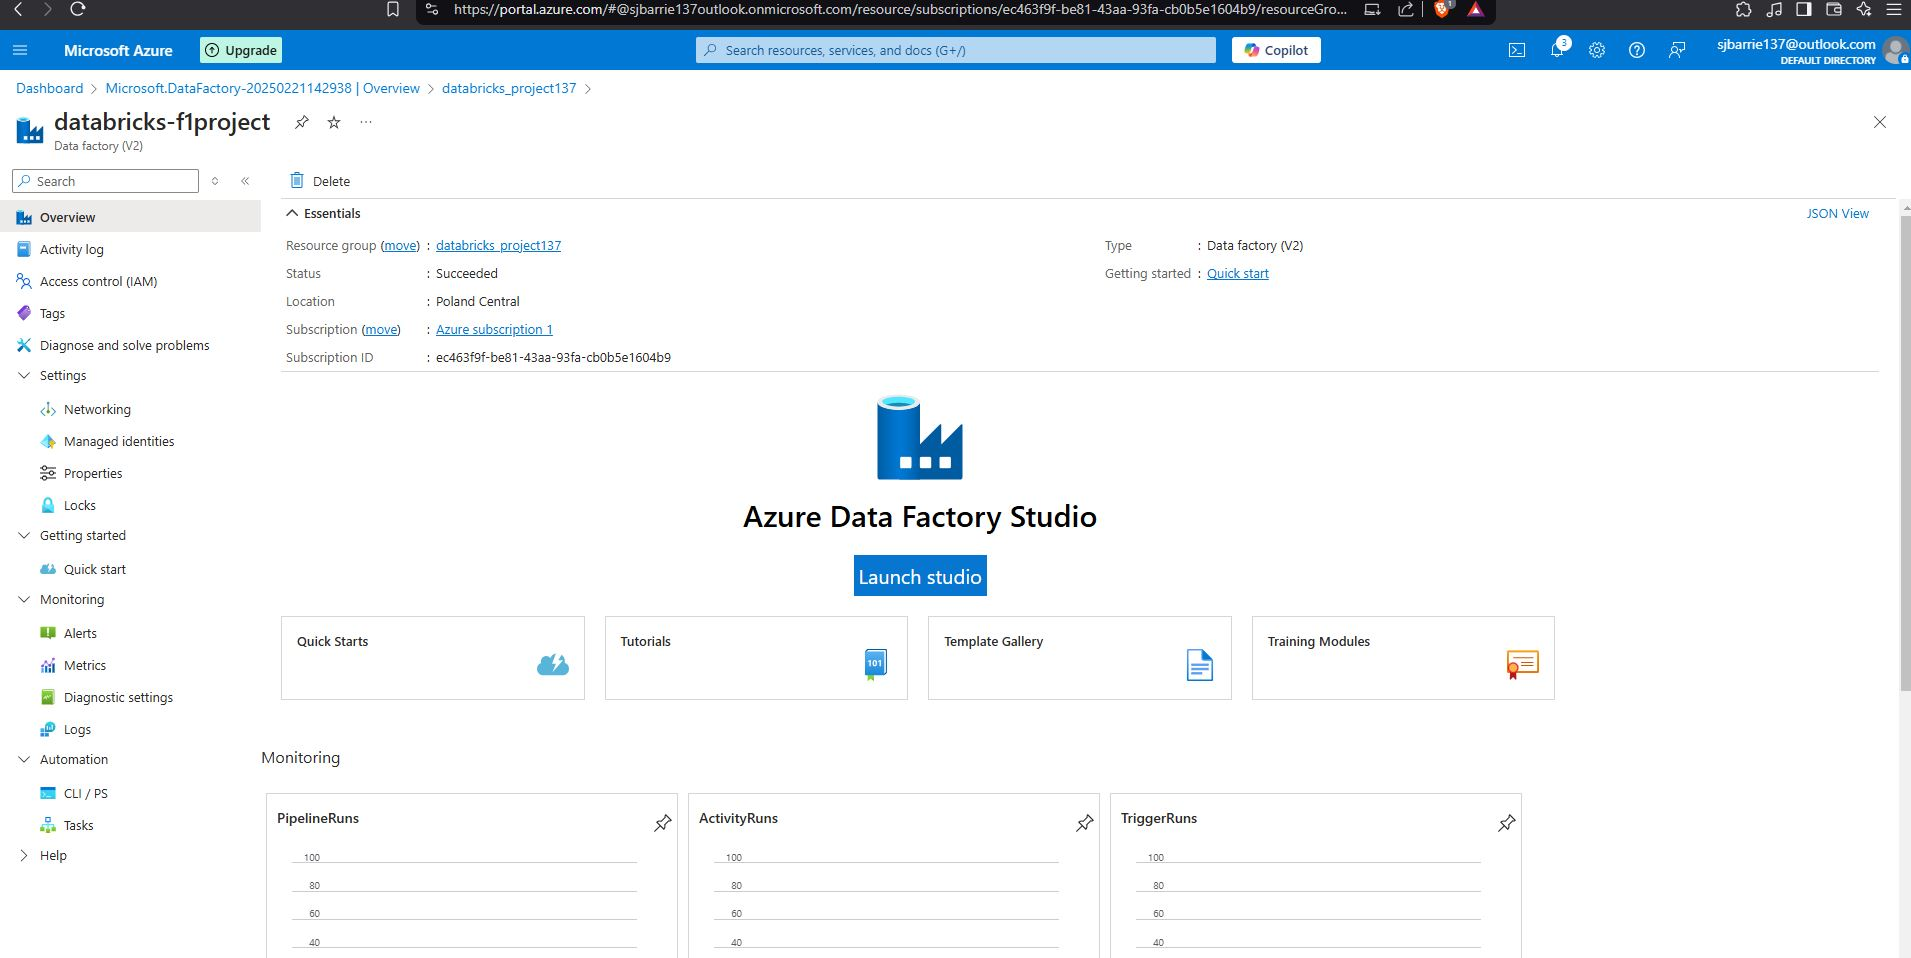

### Master Pipeline

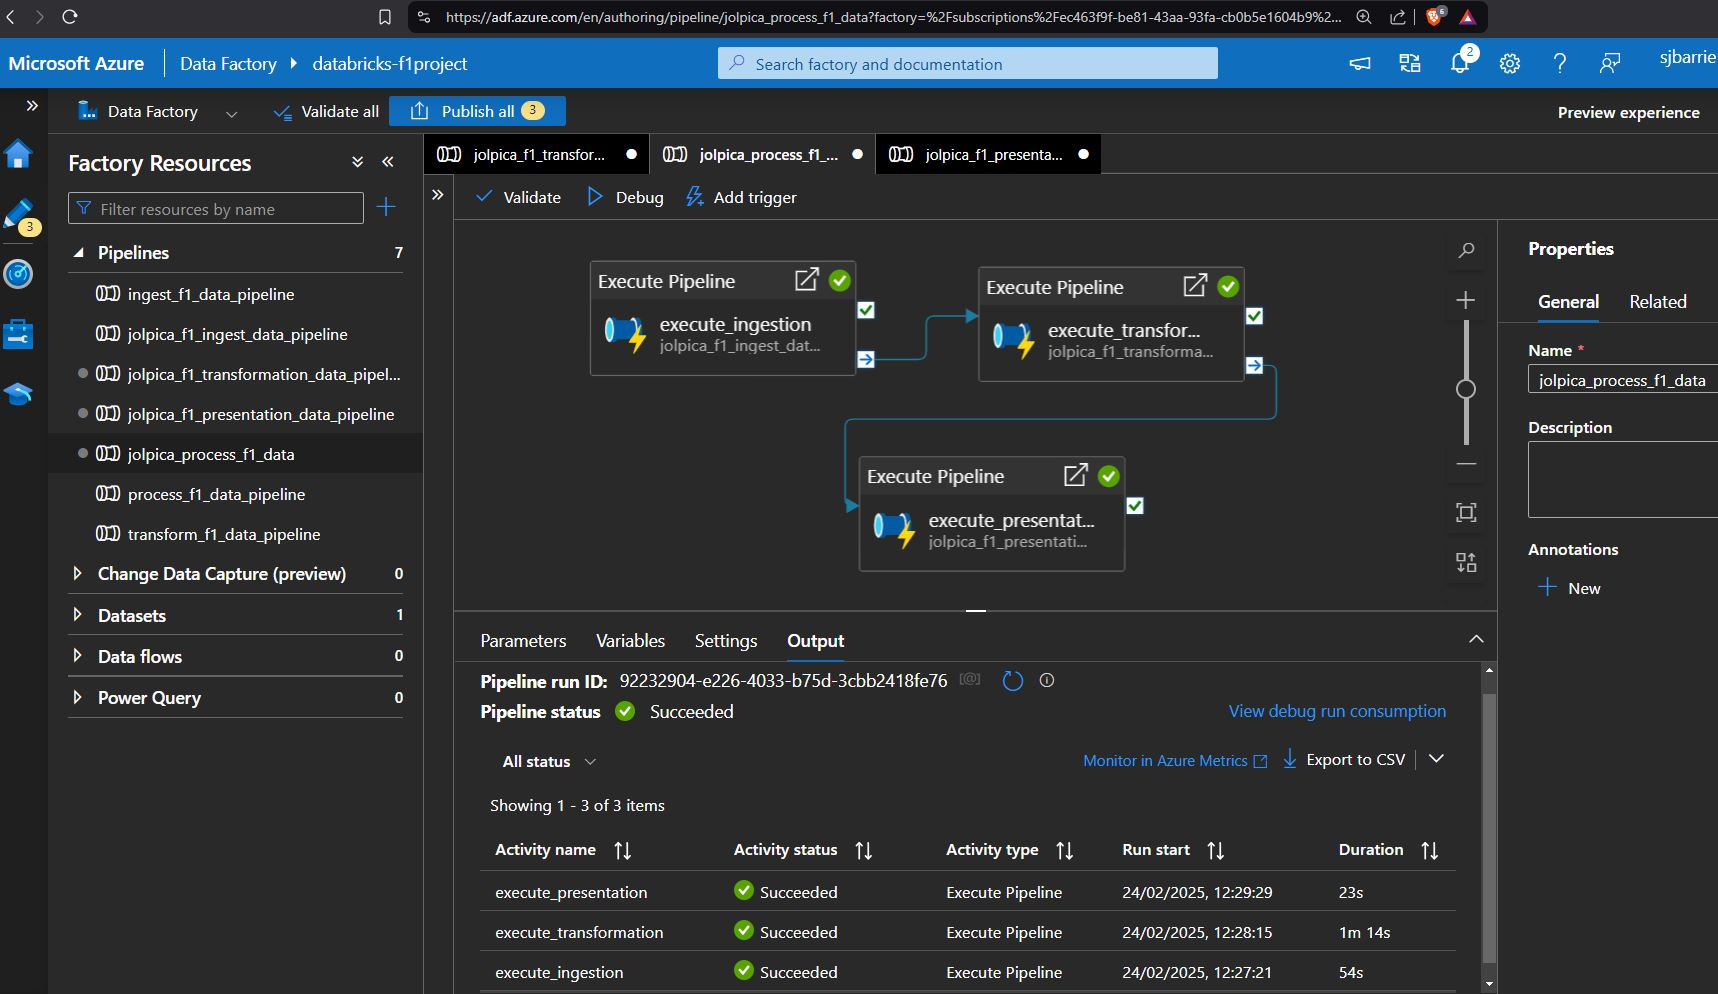

### Ingestion Pipeline

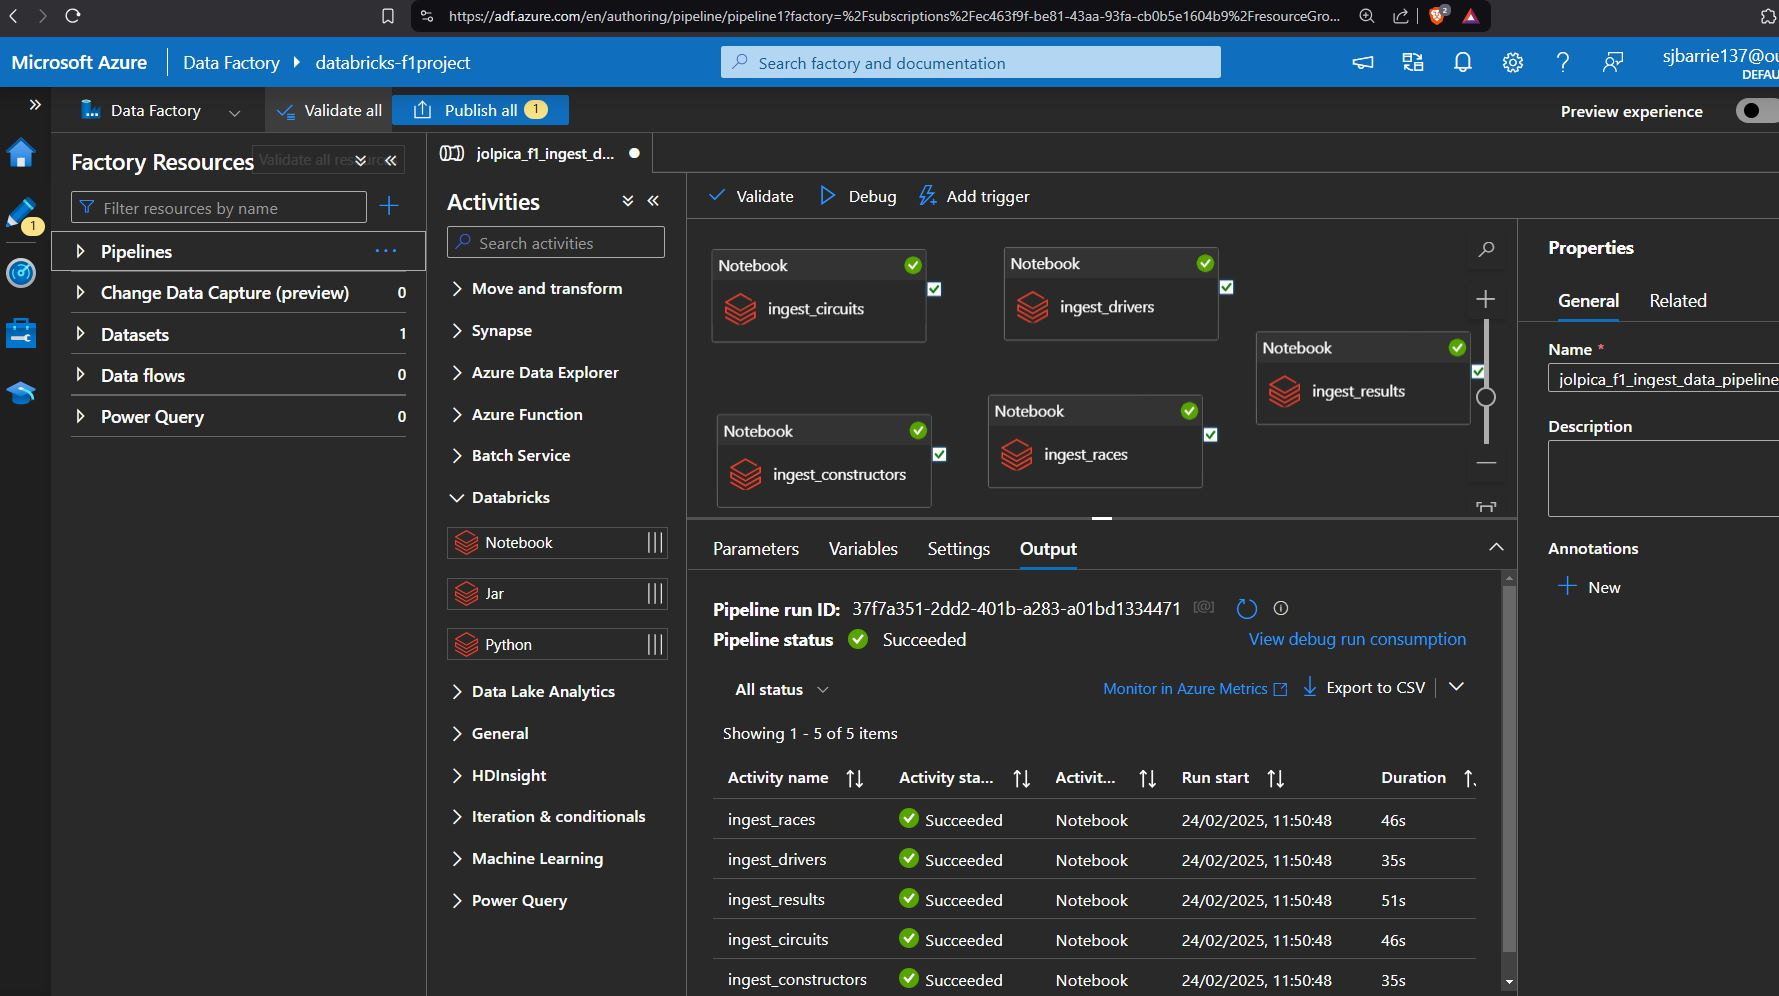

### Transformation Pipeline

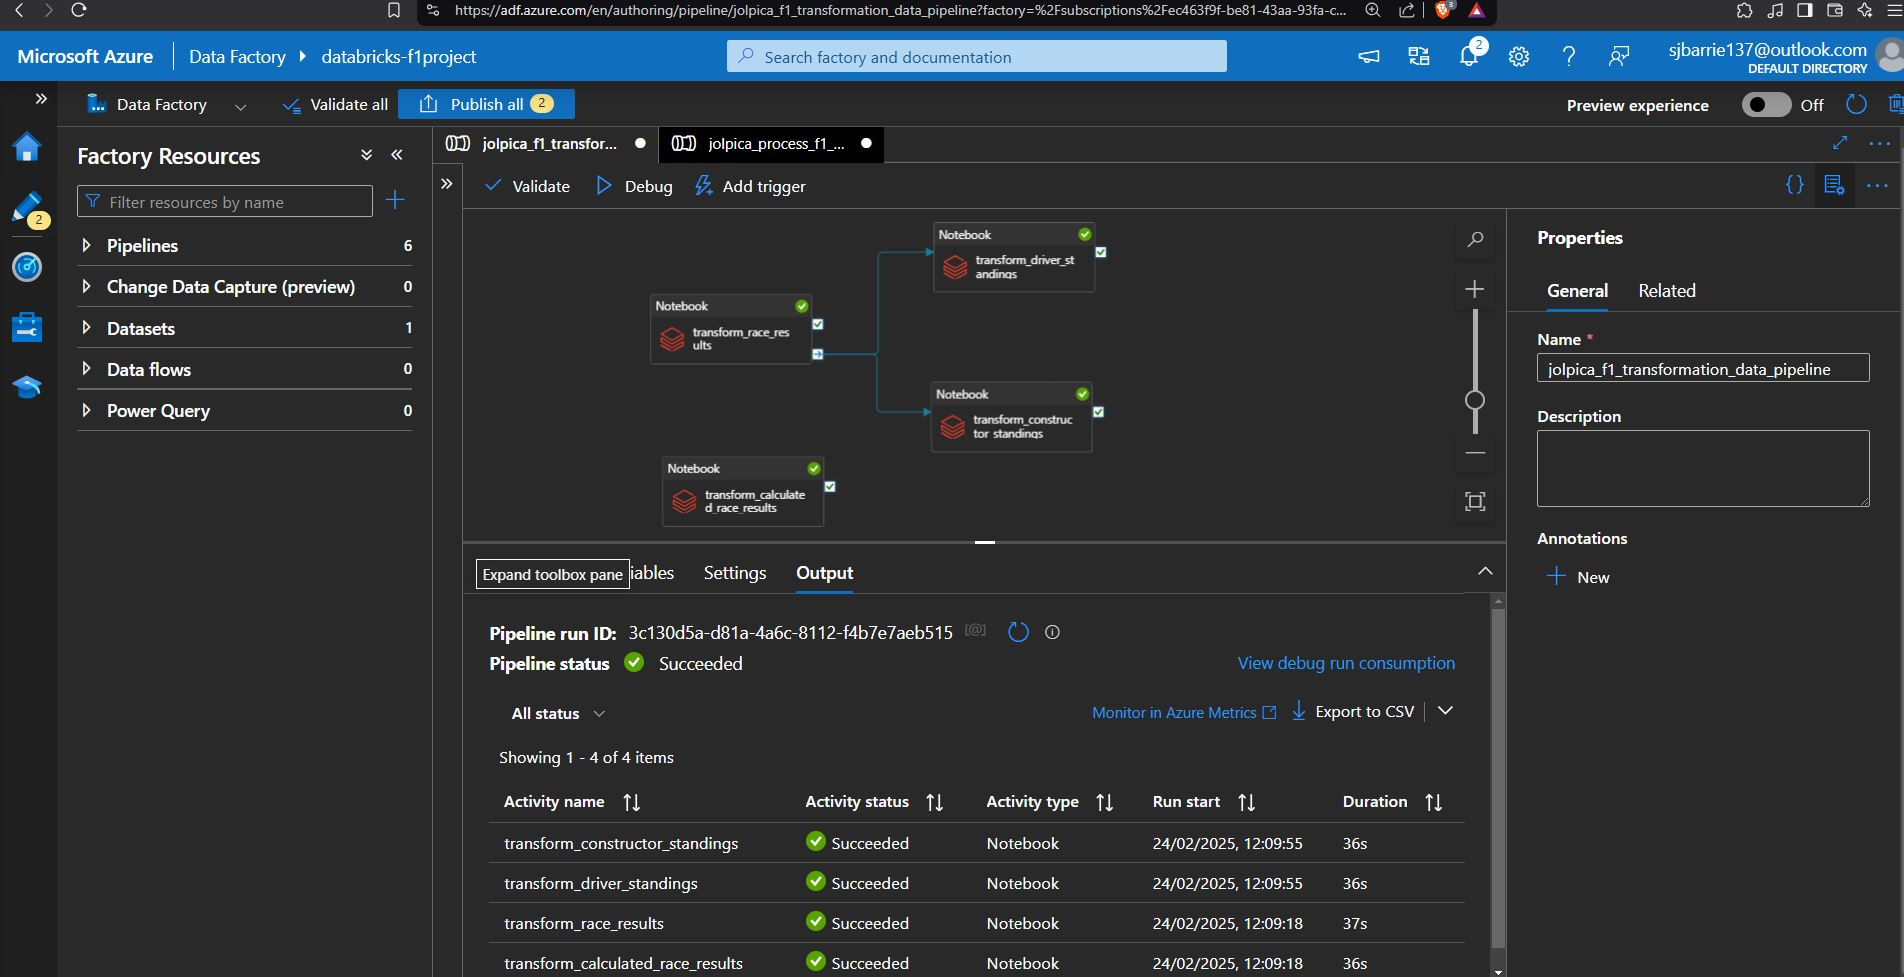

### Presentation Pipeline

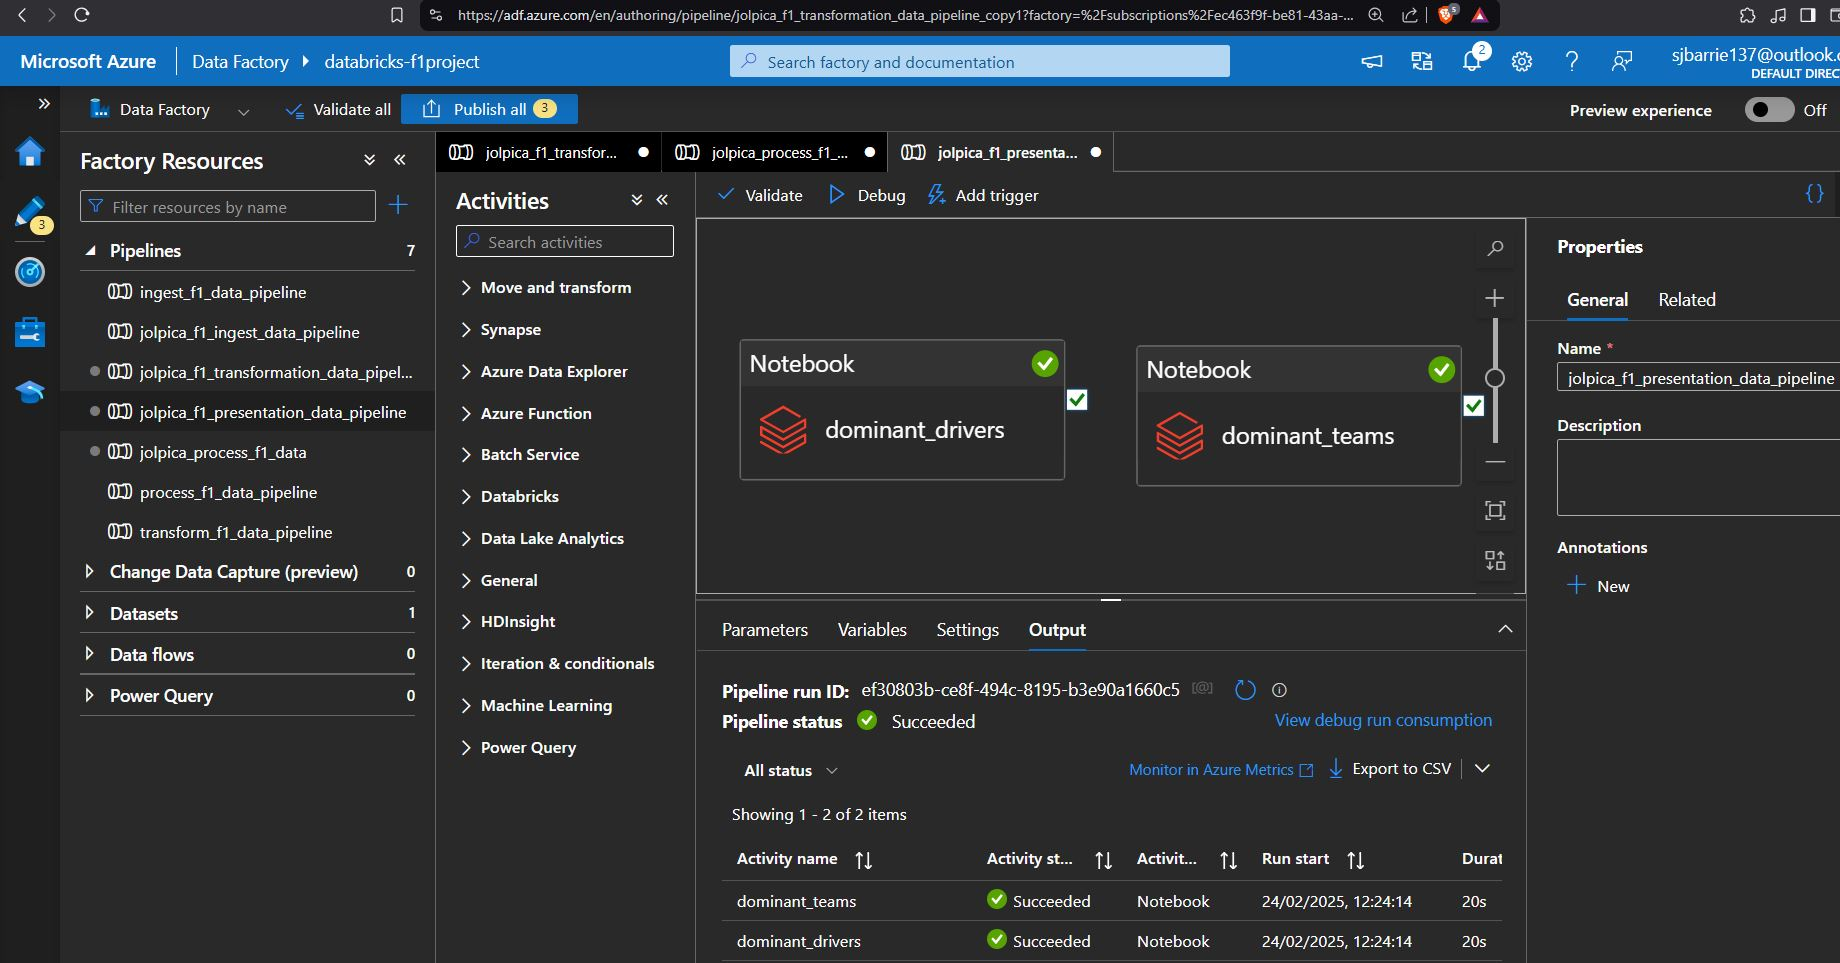

### Creating a Trigger

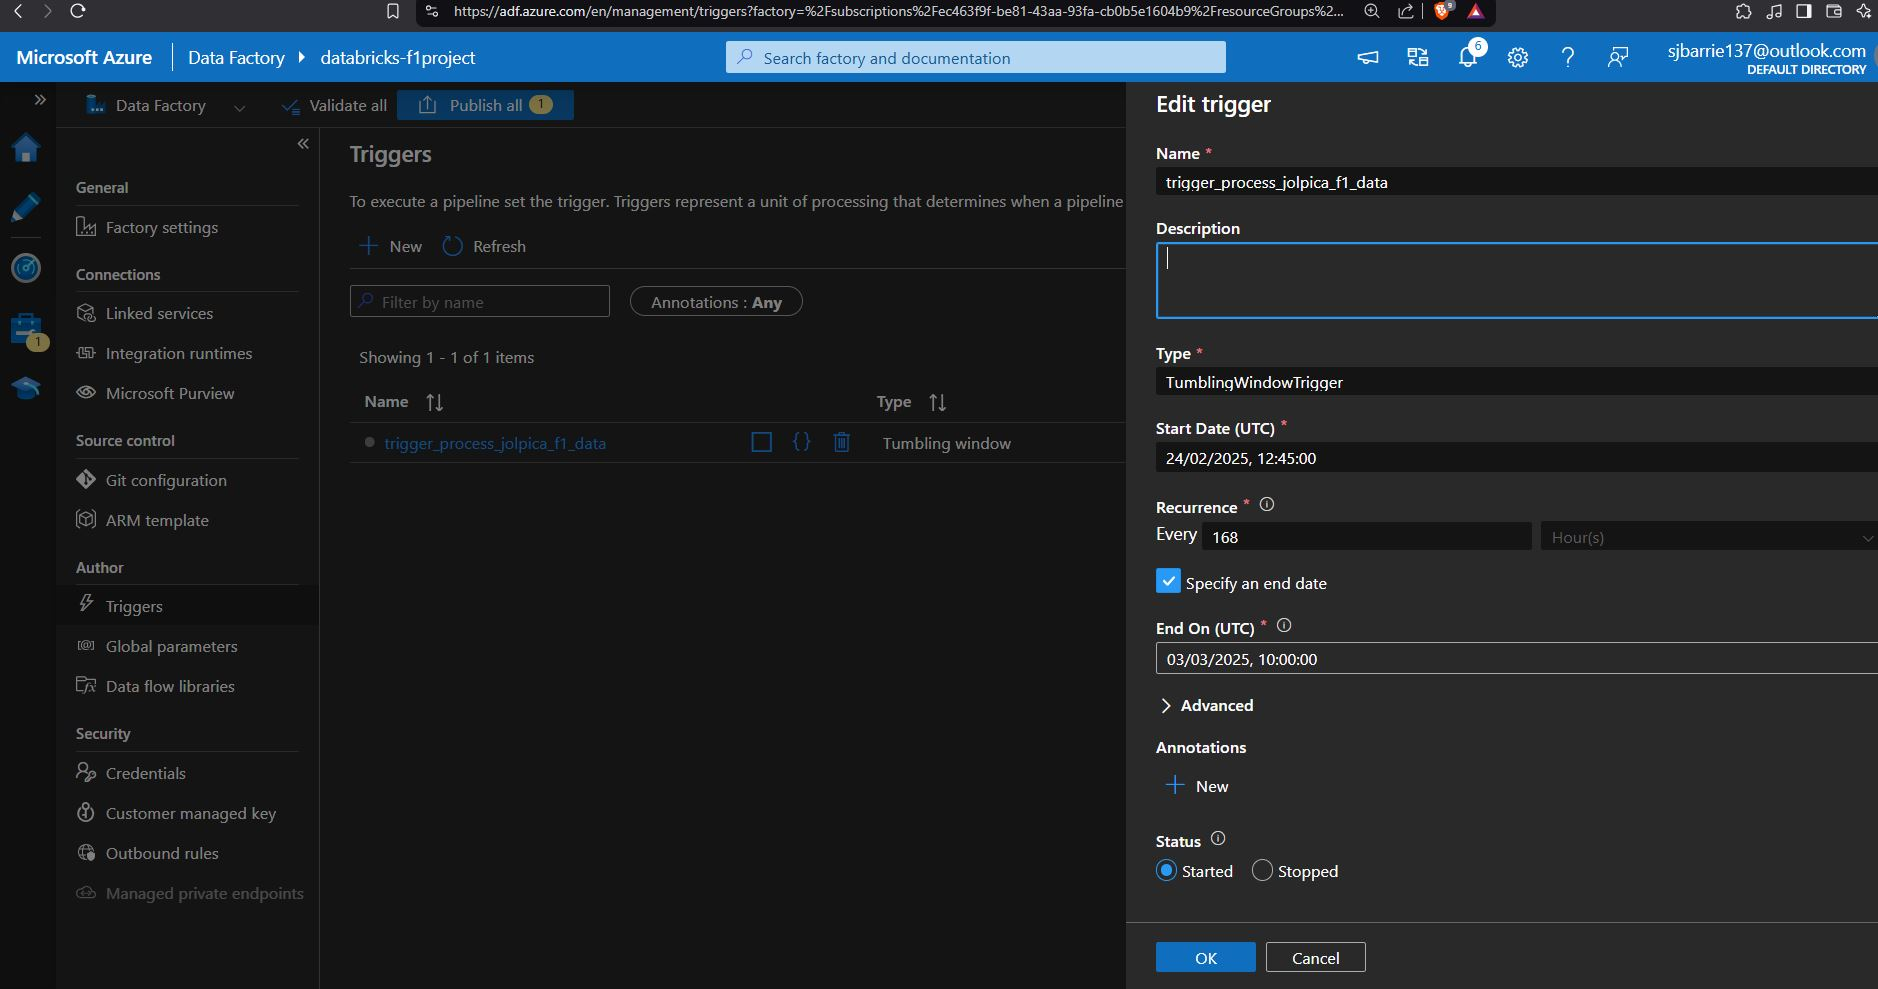

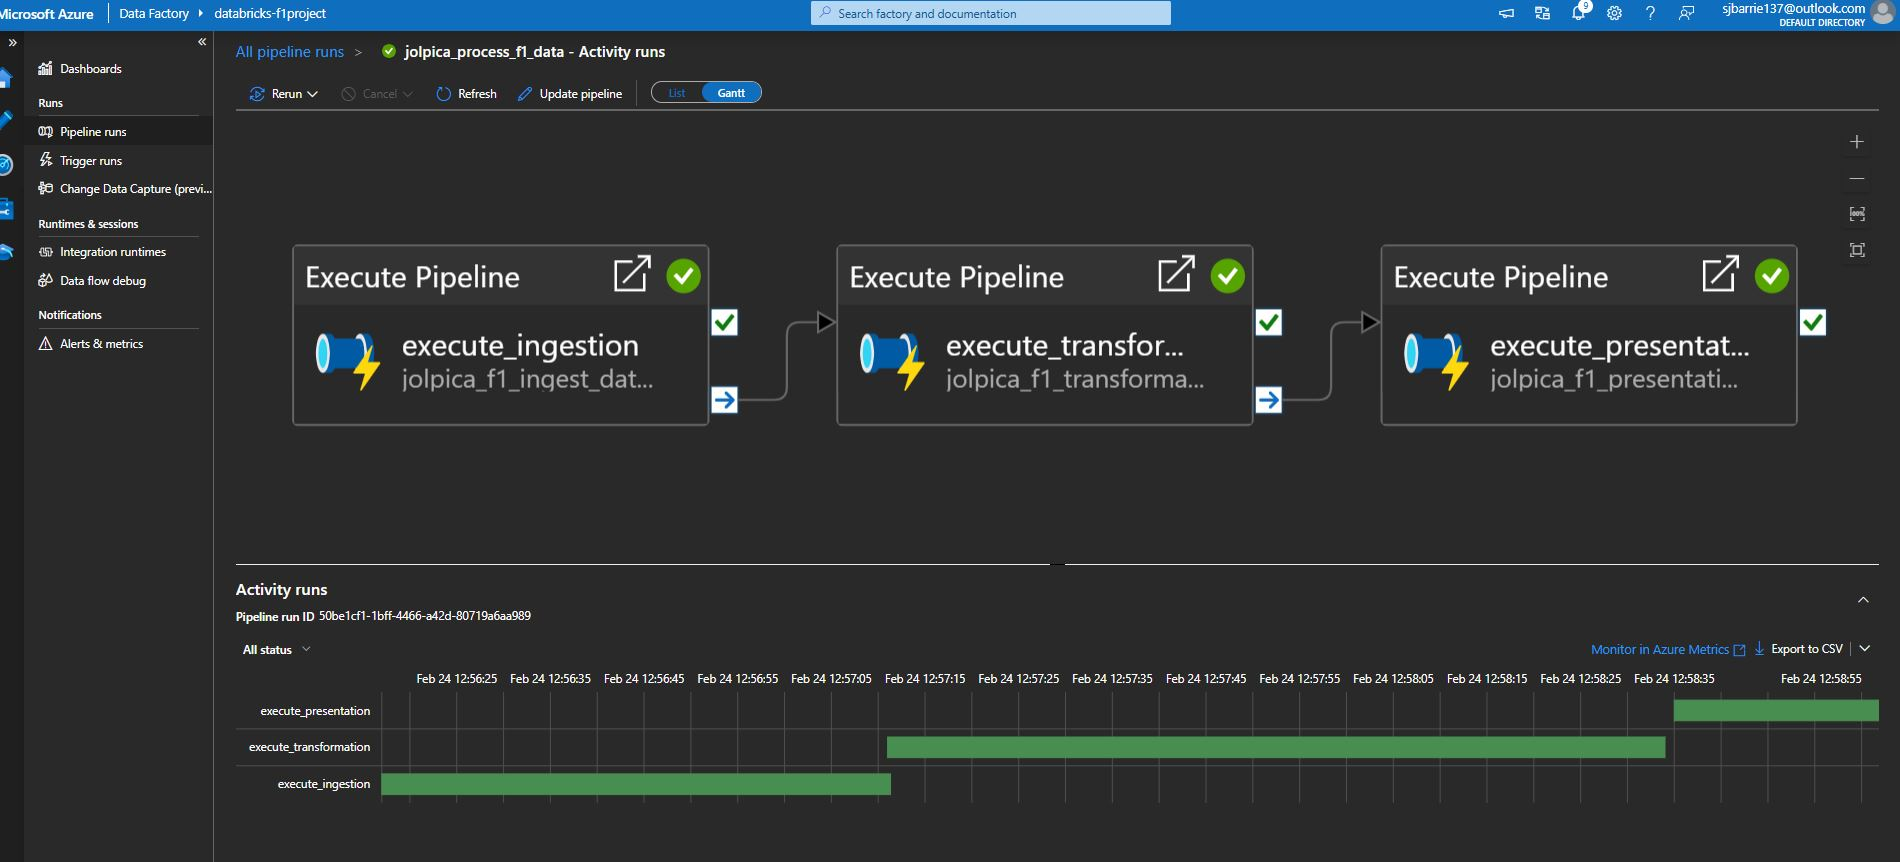

## Data Viz

DataBricks includes a very good in-built visualisation tool which allows you to create charts and dashboards from within the notebook.

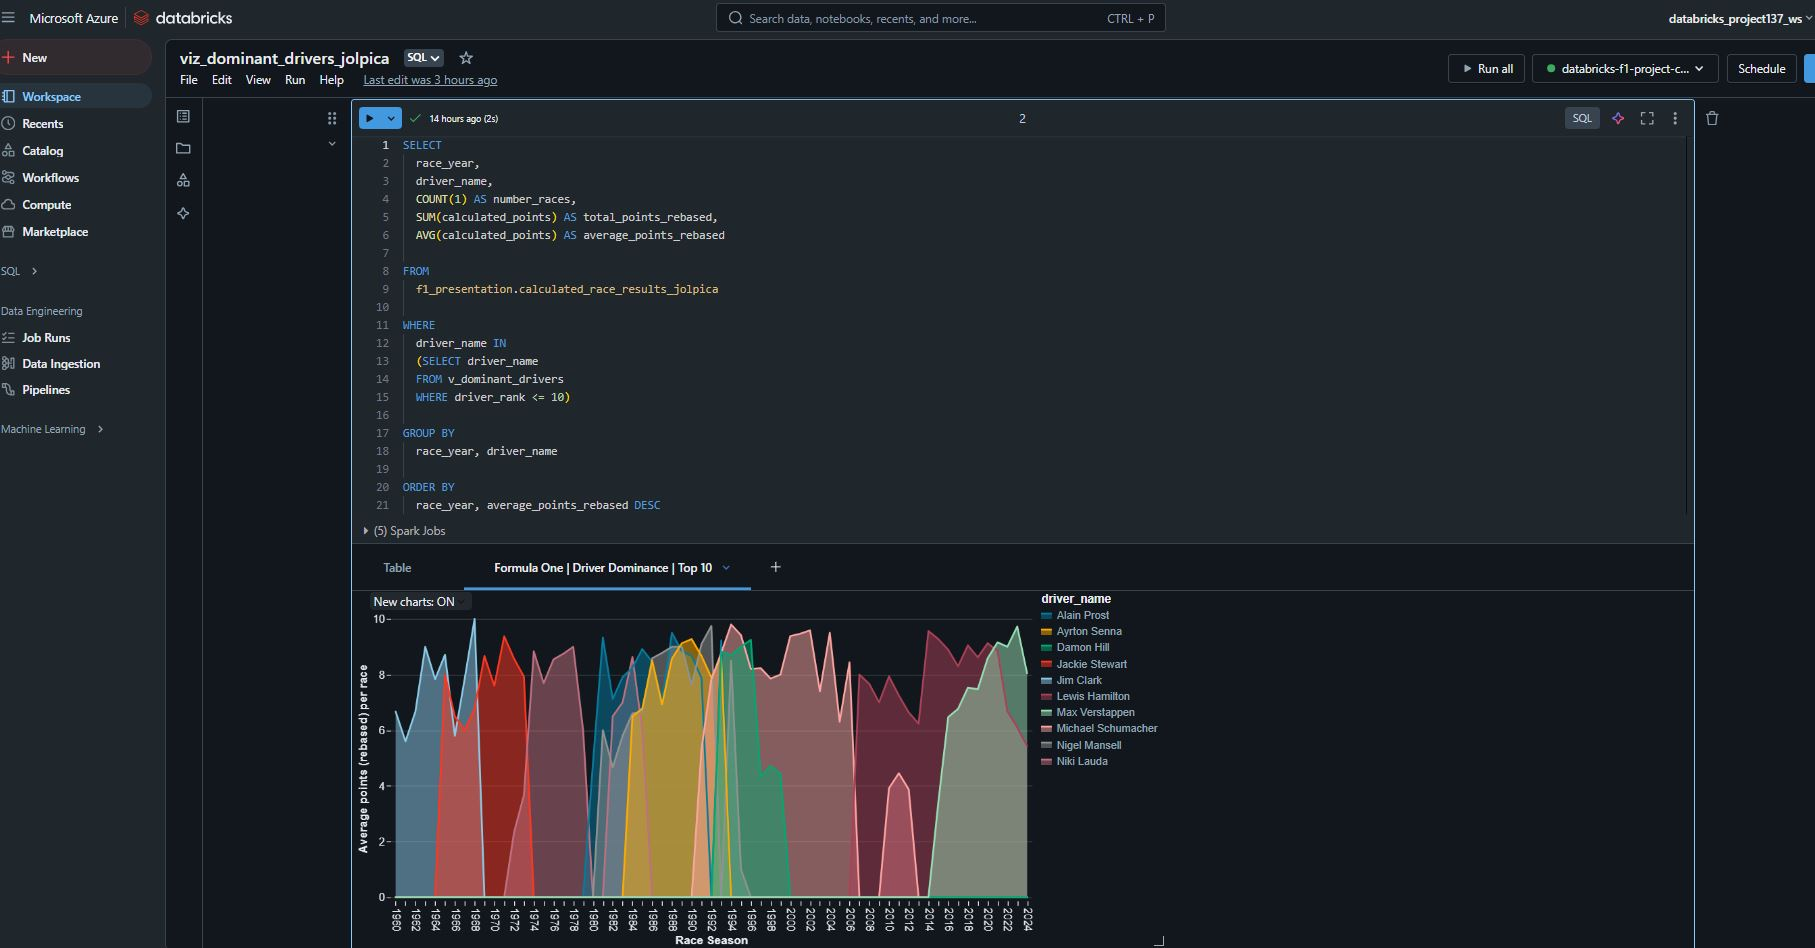

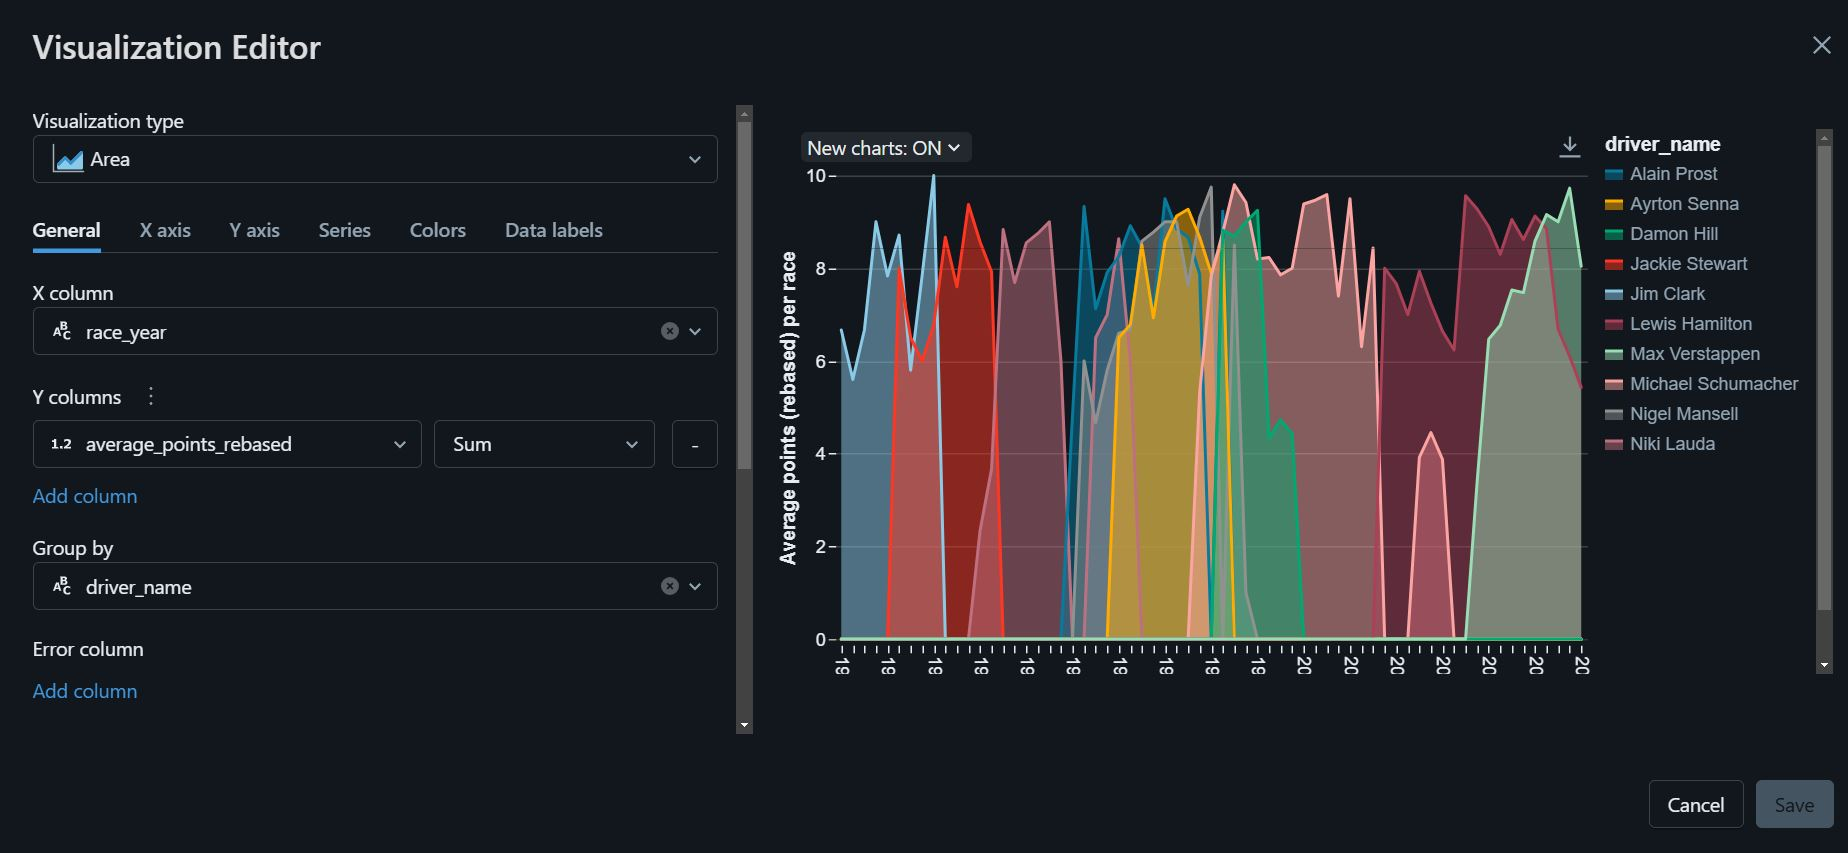


### Drivers

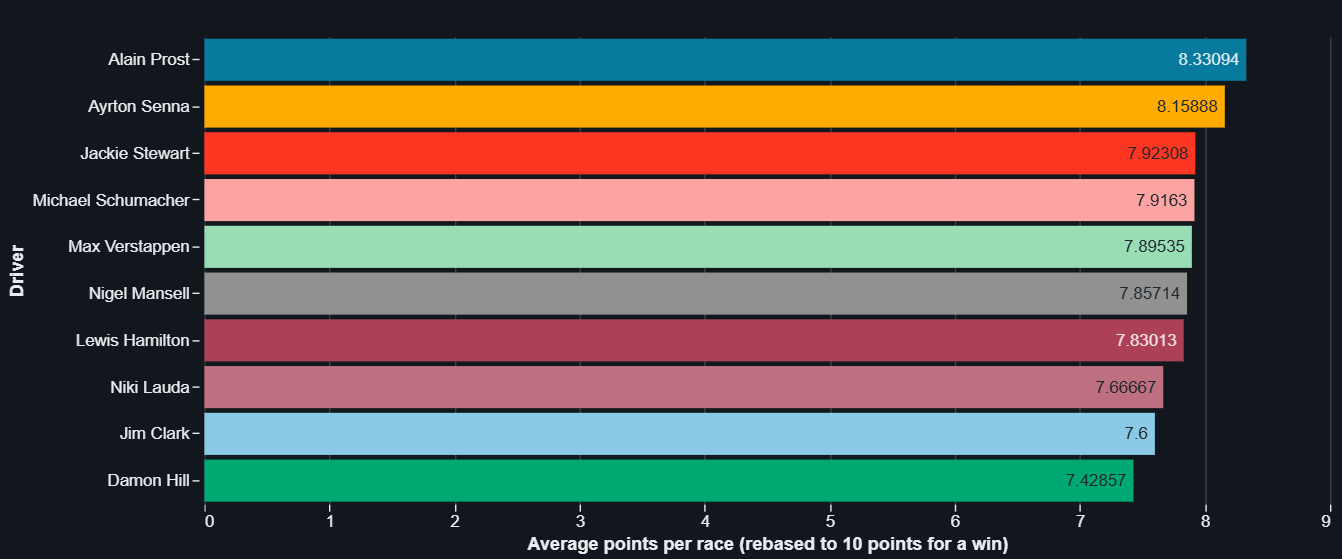

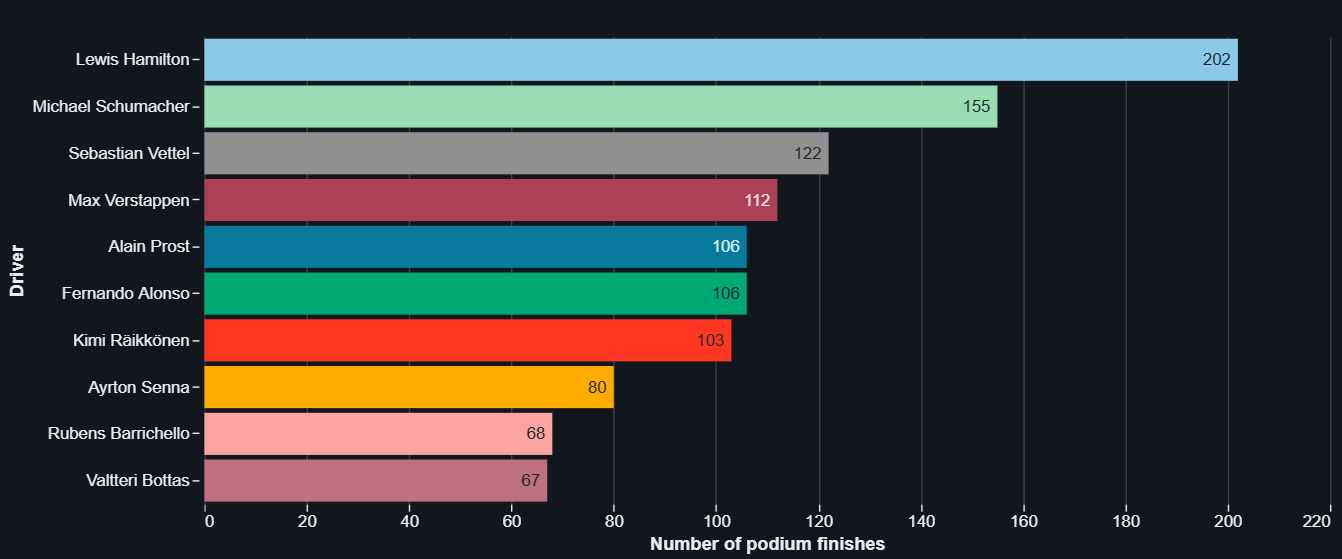


### Constructors

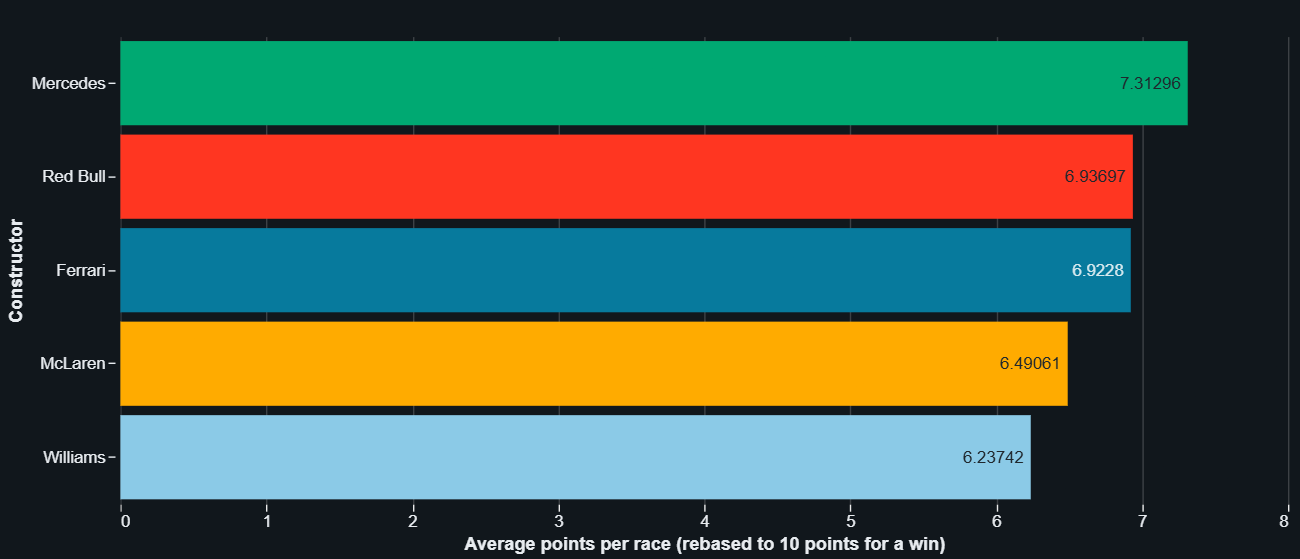

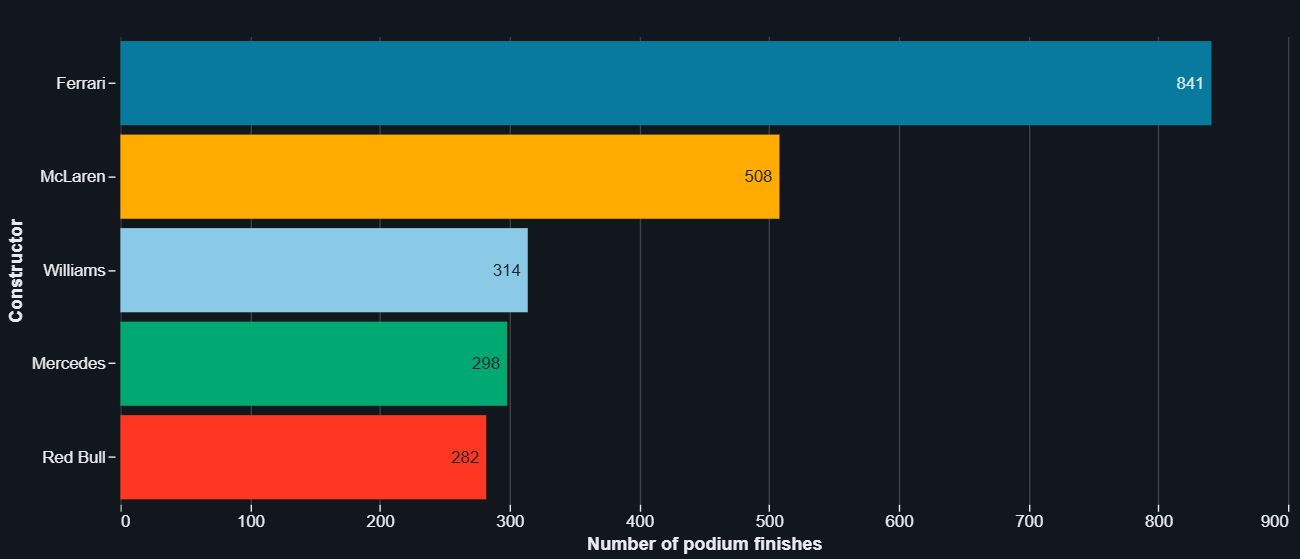

### Connecting to Other BI tools
You can also connect the data from DataBricks to a vast choice of connectors, e.g. Power BI, Tableau etc.

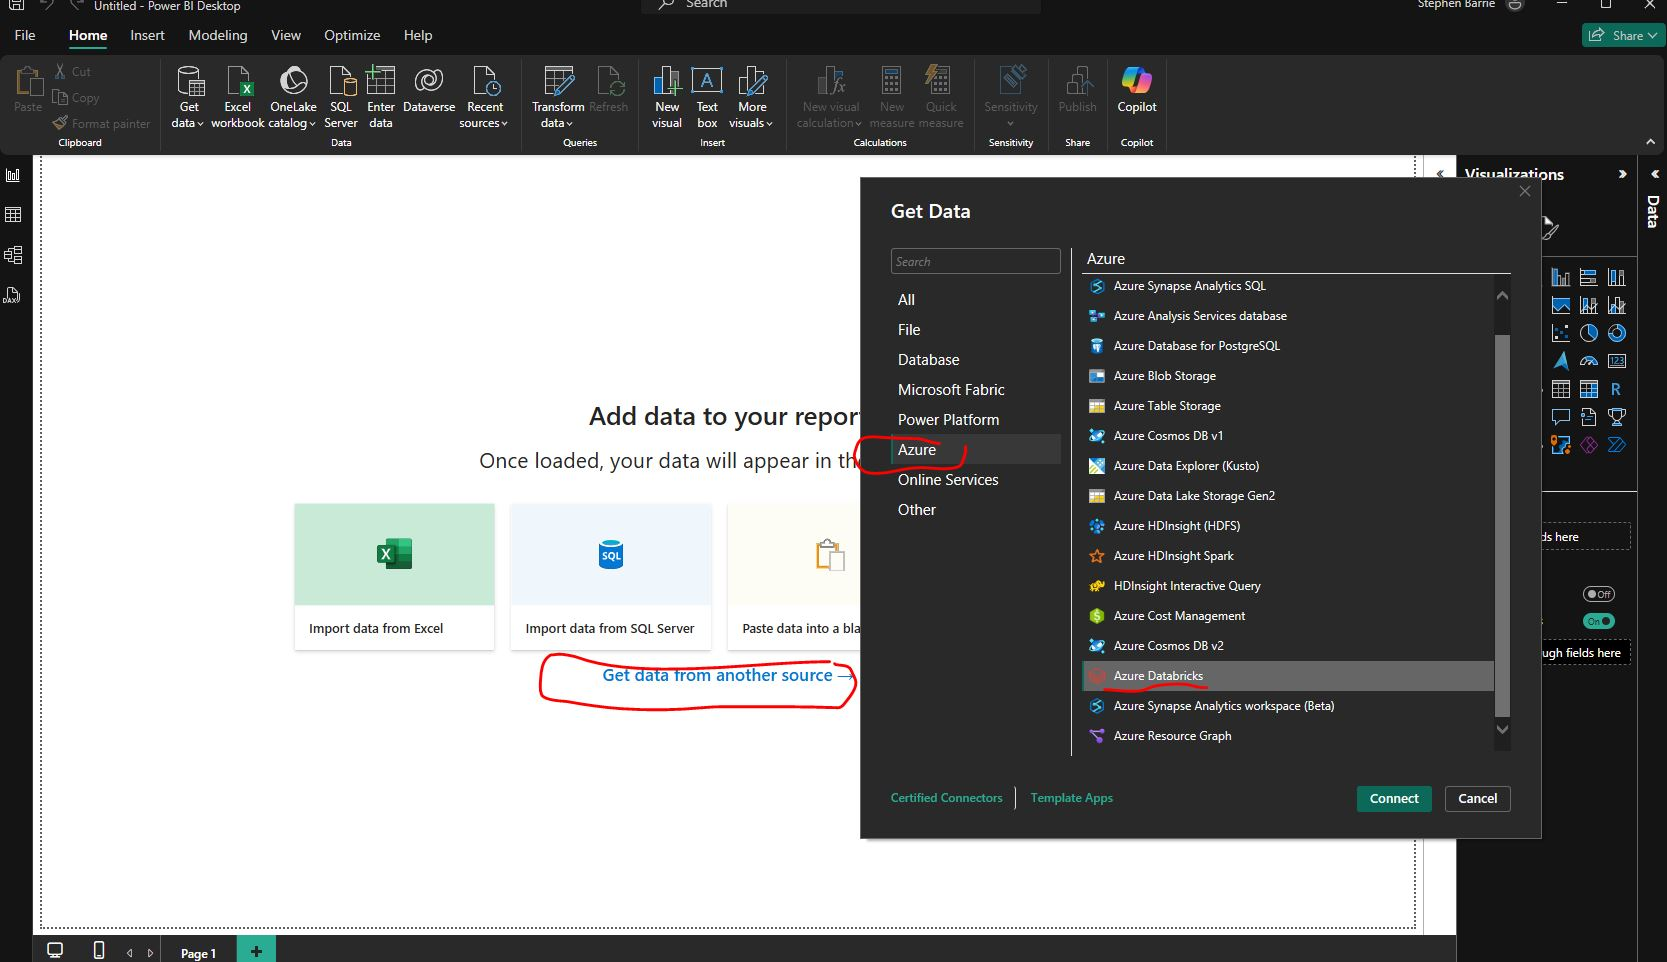

To do this, you will generally need the Server Hostname and HTTP Path:

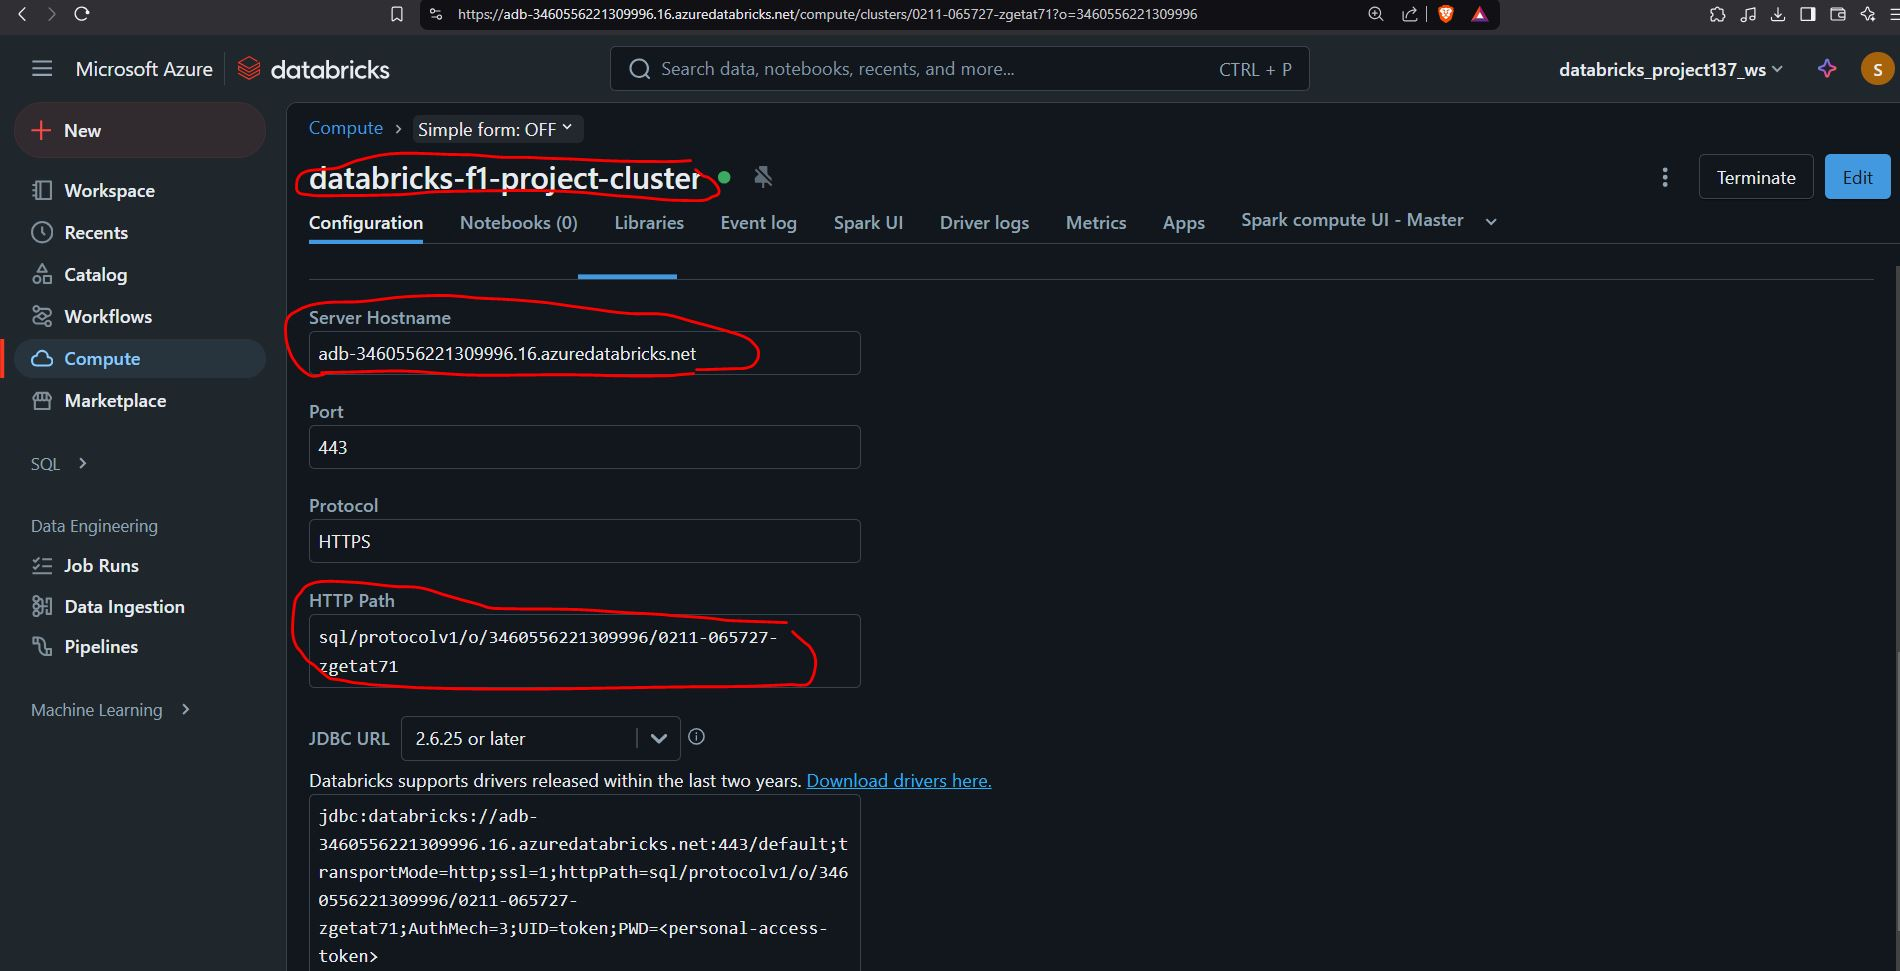

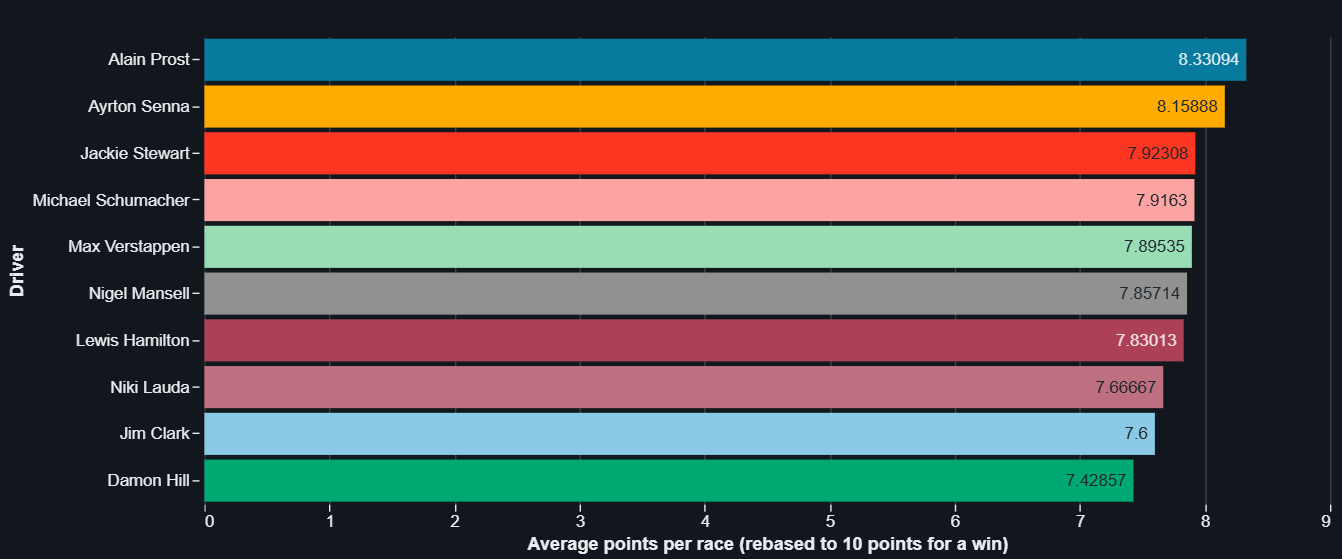

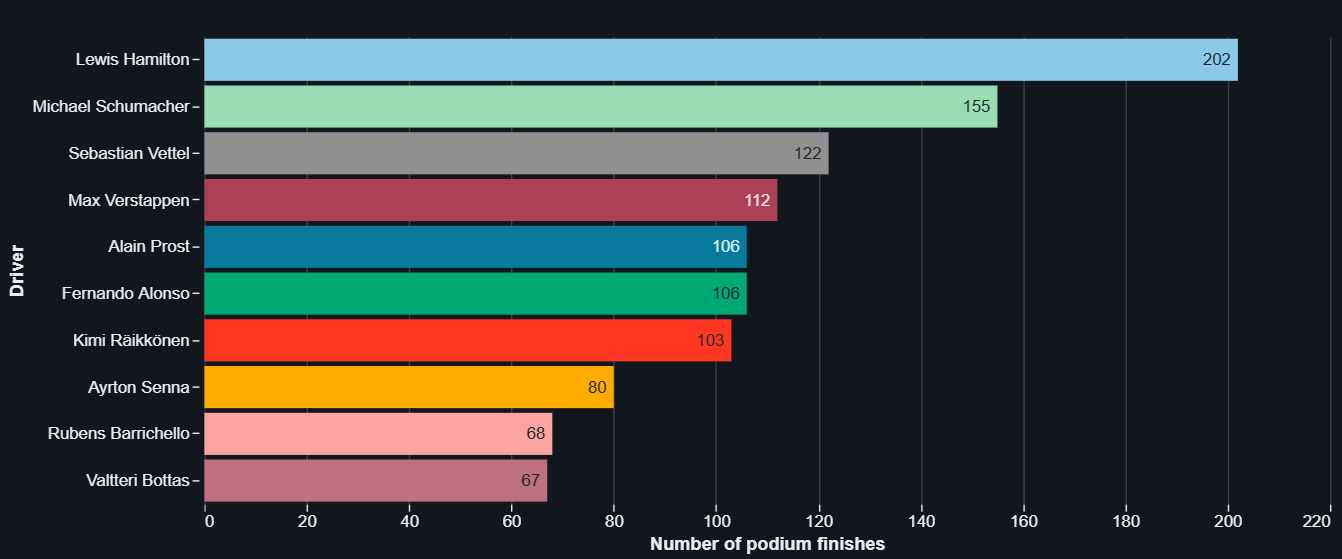